<div align = "center">
    <b><font size = "8"> Text Classification </font></b>
    <br><b><font size = "6"> Deep Learning Based Approaches for Emotion Classification and Text Mining on Social
Media </font></b><br>
    <br><b><font size = "6"> Course Work </font></b><br>
</div>

<div align = "right" style = "font-size: 3em">
<b><font size = "5"> Faculty of Computer Science
<br> Name : Kim Jae - Wook
<br> Email : dzhkim@edu.hse.ru <br>
</font></b>


<h2 style="text-align: center;"></h2>

<center>
  <h1> Step 1 &nbsp : &nbsp Preparation for Text Classification </h1>
</center>

<h2 style="text-align: center;"></h2>

<center>
  <h2> Step 1 - 1 &nbsp : &nbsp Environment Setup and Data Loading </h2>
</center>

In [ ]:
import pandas as pd
import nltk
import string
import re
import time

time_results = []

from google.colab import files
uploaded = files.upload()

# === Data Load from local Excel files ===
train = pd.read_excel('train.xlsx')
val   = pd.read_excel('val.xlsx')
test  = pd.read_excel('test.xlsx')

# === Unify column names ===
#   Review Text → text
#   Review Rating → target
train.rename(columns={'Review Text':'text', 'Review Rating':'target'}, inplace=True)
val  .rename(columns={'Review Text':'text', 'Review Rating':'target'}, inplace=True)
test .rename(columns={'Review Text':'text', 'Review Rating':'target'}, inplace=True)

# === Encode labels ===
# Review Rating: 1 = Extremely Negative, 2 = Negative,
#                3 = Neutral,            4 = Positive,
#                5 = Extremely Positive
# Target values 0–4 in that order:
#   0: Extremely Negative
#   1: Negative
#   2: Neutral
#   3: Positive
#   4: Extremely Positive
for df in (train, val, test):
    df['target'] = df['target'].astype(int) - 1

# === Prepare y for training ===
y_train = train['target']


Saving val.xlsx to val.xlsx
Saving train.xlsx to train.xlsx
Saving test.xlsx to test.xlsx


<h2 style="text-align: center;"></h2>

<center>
  <h2> Step 1 - 2 &nbsp : &nbsp  Check out the data on CSV files </h2>
</center>

In [ ]:
def checkout_data(df, whichdata):
    print(f"Preview of {whichdata} data:")
    print(df.head())
    print(f"\nBasic information of {whichdata} data:")
    df.info()
    print(f"\nNumber of missing values in {whichdata} data:")
    print(df.isnull().sum())

checkout_data(train, "Train")
checkout_data(test,  "Test")

Preview of Train data:
               Author                                               text  \
0         Holly Berry  I live in Gulf Breeze and NYE was celebrating ...   
1  Nunof Yourbusiness  Always a great experience with this hospital. ...   
2        Kerry Bodily  Always superior staff, procedures, prompt resu...   
3              Kyra H  Ok soooooo the other reviews were right. This ...   
4          Derek Quad  I would give less than 1 star if I could. The ...   

   target       state  
0       4     Florida  
1       4       Maine  
2       4      Oregon  
3       0  California  
4       0   Wisconsin  

Basic information of Train data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Author  34999 non-null  object
 1   text    35000 non-null  object
 2   target  35000 non-null  int64 
 3   state   35000 non-null  object
dtypes: int64(1), 

<h2 style="text-align: center;"></h2>

<center>
  <h1> Step 2 &nbsp : &nbsp Build <strong><font color="#00BFFF">TF-IDF & BoW models </strong></font></h1>
</center>

<h2 style="text-align: center;"></h2>

<center>
  <h2> Step 2 - 1 &nbsp : &nbsp  Data Preprocessing ( Tokenization & Lemmatization ) </h2>
</center>

In [ ]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import pandas as pd

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Define text preprocessing function
def preprocess(text):
    if not isinstance(text, str):
        return []
    text = text.lower()
    text = re.sub(r'http\S+', '', text)       # remove URLs
    text = re.sub(r'@\S+', '', text)          # remove mentions
    text = text.replace('#', '')              # remove hashtag symbols
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in string.punctuation]
    stop = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop]
    lem = WordNetLemmatizer()
    return [lem.lemmatize(t) for t in tokens]

# Apply preprocessing
train['text_processed'] = train['text'].apply(preprocess)
test['text_processed']  = test['text'].apply(preprocess)

# Recombine tokens into strings
train['text_str'] = train['text_processed'].apply(lambda tokens: " ".join(tokens))
test['text_str']  = test['text_processed'].apply(lambda tokens: " ".join(tokens))

# Split into training and validation sets using y_train
X_tr_str, X_val_str, y_tr, y_val = train_test_split(
    train['text_str'],
    y_train,            # previously defined as train['target']
    test_size=0.2,
    random_state=100,
    stratify=y_train    # maintain label distribution
)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## <font color="red">Why choosing NLTK's word_tokenize and WordNetLemmatizer</font>

(1) &nbsp; <font color="#7CFC00">**word_tokenize**</font>
 : Simple yet robust for English text.

- It works efficiently even on large datasets and is suitable for general sentence structures.
<br><br>

(2) &nbsp; <font color="#7CFC00">**WordNetLemmatizer**</font>
 : Unifies various forms of words  into their base form.

- Reducing noise from word variations and facilitating meaning-based comparisons.

- In particular, lemmatization is more advantageous for preserving context and meaning than stemming.

<h2 style="text-align: center;"></h2>

<center>
  <h2> Step 2 - 2 &nbsp : &nbsp  Apply TF-IDF and BoW vectorizers </h2>
</center>

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# TF-IDF Vectorization (Tuned Hyperparameter)
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=2, max_df=0.9, max_features=10000)
X_tr_tfidf  = tfidf.fit_transform(X_tr_str)
X_val_tfidf = tfidf.transform  (X_val_str)

# -----------------------------------------------------------------------

# BoW
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(ngram_range=(1,2), min_df=2, max_df=0.9, max_features=10000)
X_tr_bow  = bow.fit_transform(X_tr_str)
X_val_bow = bow.transform  (X_val_str)

<h2 style="text-align: center;"></h2>

<center>
  <h2> Step 2 - 3 &nbsp : &nbsp  Multiclass Logistic Regression with TF-IDF and Hyperparameter Optimization </h2>
</center>

In [ ]:
# LogisticRegression (multinomial) + GridSearchCV
param_grid = {'estimator__C': [0.1, 1, 10]}
clf_tfidf = GridSearchCV(
    OneVsRestClassifier(LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs', class_weight='balanced')),
    param_grid, cv=3, scoring='accuracy', n_jobs=-1
)
start = time.time()
clf_tfidf.fit(X_tr_tfidf, y_tr)
elapsed_tfidf = time.time() - start

time_results.append({
    'Method':   'TF-IDF + LR (GridSearchCV)',
    'Time_sec': elapsed_tfidf
})

print("TF-IDF Grid - Best C:", clf_tfidf.best_params_)
print("TF-IDF Validation Accuracy:", accuracy_score(y_val, clf_tfidf.predict(X_val_tfidf)))
print(f"TF-IDF Grid Search Time: {elapsed_tfidf:.2f} seconds")

# F1 (weighted)
preds_val_tfidf = clf_tfidf.predict(X_val_tfidf)
print("TF-IDF Validation F1 (weighted):", f1_score(y_val, preds_val_tfidf, average='weighted'))

# Test Predicition
X_test_tfidf = tfidf.transform(test['text_str'])
pred_test_tfidf = clf_tfidf.predict(X_test_tfidf)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' w

TF-IDF Grid - Best C: {'estimator__C': 1}
TF-IDF Validation Accuracy: 0.8157142857142857
TF-IDF Grid Search Time: 27.23 seconds
TF-IDF Validation F1 (weighted): 0.8135147119600884


<h2 style="text-align: center;"></h2>

<center>
  <h2> Step 2 - 4 &nbsp : &nbsp	Applying BoW based model </h2>
</center>

 Fine-tuning approach (GridSearchCV + OVR Logistic Regression), where the model is validated multiple times using tuned parameters to select the final version.

In [ ]:
clf_bow = GridSearchCV(
    OneVsRestClassifier(LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs', class_weight='balanced')),
    param_grid, cv=3, scoring='accuracy', n_jobs=-1
)
start = time.time()
clf_bow.fit(X_tr_bow, y_tr)
elapsed_bow = time.time() - start

time_results.append({
    'Method':   'BoW + LR (GridSearchCV)',
    'Time_sec': elapsed_bow
})

print("BoW Grid - Best C:", clf_bow.best_params_)
print("BoW Validation Accuracy:", accuracy_score(y_val, clf_bow.predict(X_val_bow)))
print(f"BoW Grid Search Time: {elapsed_bow:.2f} seconds")

preds_val_bow = clf_bow.predict(X_val_bow)
print("BoW Validation F1 (weighted):", f1_score(y_val, preds_val_bow, average='weighted'))

X_test_bow = bow.transform(test['text_str'])
pred_test_bow = clf_bow.predict(X_test_bow)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' w

BoW Grid - Best C: {'estimator__C': 0.1}
BoW Validation Accuracy: 0.8082857142857143
BoW Grid Search Time: 67.85 seconds
BoW Validation F1 (weighted): 0.8087666806144633


<h2 style="text-align: center;"></h2>

<center>
  <h2><strong> Results from Test sets summarized in Table </strong></h2>
</center>

In [ ]:
# Test Accuracy & F1 Score
tfidf_test_accuracy = accuracy_score(test['target'], pred_test_tfidf)
bow_test_accuracy   = accuracy_score(test['target'], pred_test_bow)

tfidf_test_f1score  = f1_score(test['target'], pred_test_tfidf, average='weighted')
bow_test_f1score    = f1_score(test['target'], pred_test_bow,   average='weighted')

results_summary = pd.DataFrame({
    'Method':         ['TF-IDF', 'BoW'],
    'Test Accuracy':  [tfidf_test_accuracy, bow_test_accuracy],
    'Test F1 Score':  [tfidf_test_f1score,   bow_test_f1score]
})
print(results_summary)

best_acc = results_summary.loc[results_summary['Test Accuracy'].idxmax()]
best_f1  = results_summary.loc[results_summary['Test F1 Score'].idxmax()]

print(f"\nHighest Test Accuracy:\n Method: {best_acc['Method']}  |  Accuracy: {best_acc['Test Accuracy']:.4f}", end="\n\n")

print(f"Highest Test F1 Score:\n Method: {best_f1['Method']}  |  F1 Score:  {best_f1['Test F1 Score']:.4f}")

   Method  Test Accuracy  Test F1 Score
0  TF-IDF       0.809867       0.808060
1     BoW       0.800667       0.801861

Highest Test Accuracy:
 Method: TF-IDF  |  Accuracy: 0.8099

Highest Test F1 Score:
 Method: TF-IDF  |  F1 Score:  0.8081


<h2 style="text-align: center;"></h2>

<center>
  <h2><strong> Results summarized in Table </strong></h2>
</center>

In [ ]:
results_summary_1 = pd.DataFrame({
    'Method1': ['TF-IDF', 'BoW'],
    'Test Accuracy': [tfidf_test_accuracy, bow_test_accuracy],
    'Test F1 Score': [tfidf_test_f1score, bow_test_f1score]
})
print(results_summary_1)

  Method1  Test Accuracy  Test F1 Score
0  TF-IDF       0.809867       0.808060
1     BoW       0.800667       0.801861


The performance level of 0.53–0.55 achieved through the TF-IDF/BoW + Logistic Regression approach is assessed as a typical baseline, but it does not meet the desired target performance.

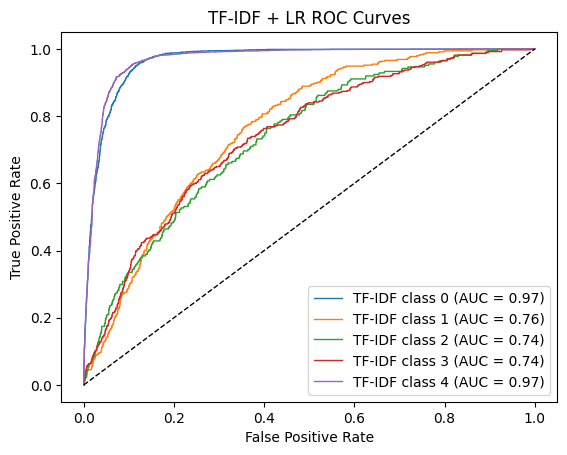

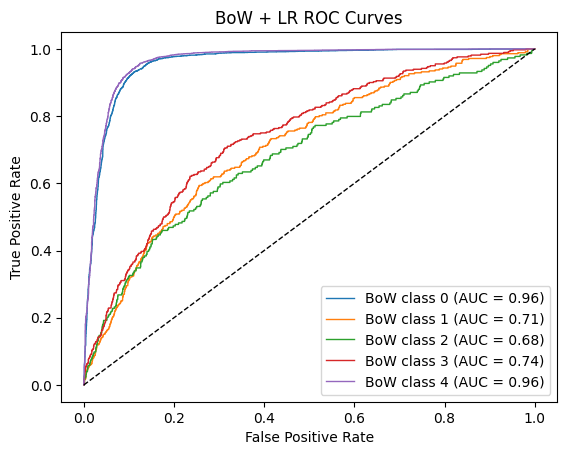

TF-IDF + LR Macro ROC AUC: 0.8351
BoW + LR Macro ROC AUC:   0.8119


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# === Binarize true labels for multiclass ROC ===
y_test_bin = label_binarize(test['target'], classes=[0, 1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# === Get probability estimates for each classifier ===
y_score_tfidf = clf_tfidf.predict_proba(X_test_tfidf)
y_score_bow   = clf_bow.predict_proba(X_test_bow)

# === Compute ROC curve and AUC for each class and micro-average ===
fpr_tfidf, tpr_tfidf, auc_tfidf = {}, {}, {}
fpr_bow,   tpr_bow,   auc_bow   = {}, {}, {}

for i in range(n_classes):
    fpr_tfidf[i], tpr_tfidf[i], _ = roc_curve(y_test_bin[:, i], y_score_tfidf[:, i])
    auc_tfidf[i] = auc(fpr_tfidf[i], tpr_tfidf[i])
    fpr_bow[i], tpr_bow[i], _     = roc_curve(y_test_bin[:, i], y_score_bow[:, i])
    auc_bow[i]   = auc(fpr_bow[i], tpr_bow[i])

# Micro-average ROC/AUC
fpr_tfidf["micro"], tpr_tfidf["micro"], _ = roc_curve(y_test_bin.ravel(), y_score_tfidf.ravel())
auc_tfidf["micro"] = auc(fpr_tfidf["micro"], tpr_tfidf["micro"])
fpr_bow["micro"],   tpr_bow["micro"],   _ = roc_curve(y_test_bin.ravel(), y_score_bow.ravel())
auc_bow["micro"]   = auc(fpr_bow["micro"], tpr_bow["micro"])

# === Plot ROC curves for TF-IDF + LR ===
plt.figure()
for i in range(n_classes):
    plt.plot(fpr_tfidf[i], tpr_tfidf[i], lw=1, label=f'TF-IDF class {i} (AUC = {auc_tfidf[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title('TF-IDF + LR ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

# === Plot ROC curves for BoW + LR ===
plt.figure()
for i in range(n_classes):
    plt.plot(fpr_bow[i], tpr_bow[i], lw=1, label=f'BoW class {i} (AUC = {auc_bow[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title('BoW + LR ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

# === Compute Macro-average ROC AUC ===
macro_auc_tfidf = roc_auc_score(y_test_bin, y_score_tfidf, average='macro')
macro_auc_bow   = roc_auc_score(y_test_bin, y_score_bow,   average='macro')
print(f"TF-IDF + LR Macro ROC AUC: {macro_auc_tfidf:.4f}")
print(f"BoW + LR Macro ROC AUC:   {macro_auc_bow:.4f}")

# === Append ROC AUC to benchmark table ===
results_summary['Macro ROC AUC'] = [macro_auc_tfidf, macro_auc_bow]


In [ ]:
from sklearn.metrics import precision_score, recall_score

# === Compute Test Metrics (precision·recall) ===
tfidf_test_precision = precision_score(test['target'], pred_test_tfidf, average='macro')
tfidf_test_recall    = recall_score   (test['target'], pred_test_tfidf, average='macro')

bow_test_precision   = precision_score(test['target'], pred_test_bow,   average='macro')
bow_test_recall      = recall_score   (test['target'], pred_test_bow,   average='macro')


In [ ]:

# =========================  Leaderboard assembly  =========================

import pandas as pd
import os

# --- 1. Compute number of trainable parameters (millions) -----------------
n_classes = len(y_train.unique())

# TF-IDF model parameters
n_features_tfidf = X_tr_tfidf.shape[1]          # 10 000 in setup
param_tfidf = (n_classes * n_features_tfidf + n_classes) / 1e6  # M parameters

# BoW model parameters
n_features_bow = X_tr_bow.shape[1]
param_bow = (n_classes * n_features_bow + n_classes) / 1e6       # M parameters

# --- 2. Wall-clock times (already measured) -------------------------------
time_tfidf = elapsed_tfidf   # from Cell 5
time_bow   = elapsed_bow     # from Cell 6

# --- 3. Build / update leaderboard ---------------------------------------
results_summary = pd.DataFrame({
    'Method':                   ['TF-IDF', 'BoW'],
    'Params (M)':               [param_tfidf, param_bow],
    'Time (s)':                 [time_tfidf,  time_bow],
    'Test Accuracy':            [tfidf_test_accuracy,       bow_test_accuracy],
    'Test Precision (macro)':   [tfidf_test_precision,      bow_test_precision],
    'Test Recall (macro)':      [tfidf_test_recall,         bow_test_recall],
    'Test F1 Score (macro)':    [tfidf_test_f1score,        bow_test_f1score],
    'Macro ROC AUC':            [macro_auc_tfidf,           macro_auc_bow]
})

print("Updated leaderboard:\n", results_summary, "\n")

# --- 4. Save to the correct CSV ------------------------------------------
os.makedirs('results', exist_ok=True)

model_tag = ''                         # 'TFIDF' or '' for the common file
fname = f'results/leaderboard{f"_{model_tag}" if model_tag else ""}.csv'
results_summary.to_csv(fname, index=False)

print(f"Leaderboard saved to → {fname}")


Updated leaderboard:
    Method  Params (M)   Time (s)  Test Accuracy  Test Precision (macro)  \
0  TF-IDF    0.050005  27.227065       0.809867                0.472493   
1     BoW    0.050005  67.854403       0.800667                0.463537   

   Test Recall (macro)  Test F1 Score (macro)  Macro ROC AUC  
0             0.471461               0.808060       0.835115  
1             0.465627               0.801861       0.811850   

Leaderboard saved to → results/leaderboard.csv


<h2 style="text-align: center;"></h2>

<center>
  <h2> Step 3 &nbsp : &nbsp	Build <strong><font color="#00BFFF">LSTM model </strong></font> based on neural networks, trained from scratch </h2>
</center>

## <font color="red">Why was LSTM architecture chosen over RNN ?</font>

LSTM, in particular, captures ***long-range dependencies*** in the text pretty well by overcoming vanishing gradient problem compared to traditional RNN, which helps in understanding its overall context and meaning. Long-term dependency refers to situations in sequential data like text or time series where information from far earlier in the sequence shapes the meaning of what comes later.


---
<br>

About ***long-range dependencies***

Long-term dependency refers to situations in sequential data like text or time series where information from far earlier in the sequence shapes the meaning of what comes later. A basic RNN has trouble keeping track of information that’s so far back, so it tends to forget details that appeared at the beginning of a sentence or story. However, models like LSTM include internal gates that control the flow of information, allowing them to hold on to important details for longer and retrieve them when necessary. Because of this, LSTMs can handle long-term dependencies effectively, keeping the overall context connected even in lengthy texts.
<br><br>
About ***vanishing gradient problem***

Vanishing gradient problem is a phenomenon that occurs during the training of neural networks, where repeated backpropagation causes the gradient (the information needed to correct errors) to gradually diminish, leading to insufficient learning of past information. Simply put, it’s an issue in which very old information fades away over time, making it harder for the model to remember or make use of that information.

<h2 style="text-align: center;"></h2>

<center>
  <h2> Step 3 - 1 &nbsp : &nbsp	Text Tokenization and Preprocessing for LSTM Model </h2>
</center>

In [ ]:
# Investigating number information about token
# This information will be used later to set the hyperparameters appropriately.

from collections import Counter

all_tokens = []
for text in train['text_str']:
    tokens = text.split()
    all_tokens.extend(tokens)

token_counter = Counter(all_tokens)

print("Total number of unique token:", len(token_counter))
print("Top 7 most frequent words and their counts:", token_counter.most_common(7))

token_counts = train['text_str'].apply(lambda x: len(word_tokenize(x)))
print("Average number of token:", token_counts.mean())
print("Maximum number of token:", token_counts.max())

Total number of unique token: 45758
Top 7 most frequent words and their counts: [('br', 20278), ('hospital', 18240), ('’', 17994), ('nurse', 16869), ('care', 15582), ('staff', 14234), ('doctor', 12919)]
Average number of token: 42.2358
Maximum number of token: 454


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Hyperparameters for tokenization and sequencing
max_vocab = 20000      # top 20k most frequent tokens
max_length = 100       # truncate or pad all sequences to length 100
oov_token = "<OOV>"

# Initialize and fit tokenizer on the training texts
tok = Tokenizer(num_words=max_vocab, oov_token=oov_token)
tok.fit_on_texts(train['text_str'])

# Convert texts to padded sequences
seq_tr   = pad_sequences(tok.texts_to_sequences(X_tr_str),
                         maxlen=max_length,
                         padding='post')
seq_val  = pad_sequences(tok.texts_to_sequences(X_val_str),
                         maxlen=max_length,
                         padding='post')
seq_test = pad_sequences(tok.texts_to_sequences(test['text_str']),
                         maxlen=max_length,
                         padding='post')

# Convert integer labels (0–4) to one-hot encodings
num_classes = 5
y_tr_cat  = to_categorical(y_tr,  num_classes)
y_val_cat = to_categorical(y_val, num_classes)


<h2 style="text-align: center;"></h2>

<center>
  <h2> Step 3 - 2 &nbsp : &nbsp	Tune hyperparameters to get the best model </h2>
</center>

<h2 style="text-align: center;"></h2>

<center>
  <h3> Step 3 - 2 ( Method 1 ) &nbsp : &nbsp <font color="#BF00FF"><strong>	Automated Hyperparameter Tuning </strong></font> </h3>
</center>

**What is Method 1 trying to do ? :** Define a hyperparameter search space with Keras Tuner ( kt.RandomSearch ) using RandomSearch algorithm and let it **AUTOMATICALLY** explore various combinations to find the optimal one.

## <font color="red">Why was this automated hyperparameter tuning method chosen ?</font>

&nbsp; -----> &nbsp; &nbsp; **Because of the Pros mentioned below**.

<br>

## **Pros**
- ***Automation*** : By using Keras Tuner to randomly or systematically explore the defined hyperparameter space, repeated experiments are performed automatically.

- ***Concise Code*** : Experiment code is simplified, and the optimal hyperparameter combination can be easily extracted.

- ***Expandability*** : Even if the hyperparameter space expands, scaling up remains straightforward.

## **Cons**
- ***Less Customization*** : Because automation tools are used, fine-grained customization of individual experiments (for example, choosing whether to use GRU or adjusting multiple LSTM layers) may be restricted.

- ***External Libraries required*** : Reliance on additional packages such as keras-tuner becomes necessary.


In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, Bidirectional
!pip install -q keras-tuner
from tensorflow.keras.models import Sequential
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    # Embedding layer: choose embedding dimension
    embedding_dim = hp.Choice('embedding_dim', [32, 64, 128])
    model.add(Embedding(max_vocab, embedding_dim, input_length=max_length))

    # Bidirectional LSTM layer: choose number of units
    lstm_units = hp.Choice('lstm_units', [32, 64, 128])
    model.add(Bidirectional(LSTM(lstm_units)))

    # Dense layer: choose number of units, then apply dropout
    dense_units = hp.Choice('dense_units', [32, 64, 128])
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(hp.Float('dropout', 0.2, 0.5, 0.1)))

    # Output layer with softmax activation
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model with Adam optimizer and categorical crossentropy loss
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model

# Initialize the RandomSearch tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='lstm_tuner',
    project_name='auto'
)

# --- Start total analysis timer ---
start = time.time()

# Show the search space summary
tuner.search_space_summary()

# Perform hyperparameter search
tuner.search(
    seq_tr, y_tr_cat,
    epochs=5,
    validation_data=(seq_val, y_val_cat)
)

# Retrieve the best hyperparameters and build the final model
best_hp = tuner.get_best_hyperparameters(1)[0]
best_model = tuner.hypermodel.build(best_hp)

# Train the final model
best_model.fit(
    seq_tr, y_tr_cat,
    epochs=10,
    batch_size=32,
    validation_data=(seq_val, y_val_cat),
    verbose=0
)

# Evaluate the final model on the validation set
loss_auto, acc_auto = best_model.evaluate(seq_val, y_val_cat, verbose=0)
pred_auto = best_model.predict(seq_val).argmax(axis=1)
f1_auto = f1_score(y_val, pred_auto, average='weighted')
print('Auto Validation Accuracy :', acc_auto, 'F1:', f1_auto)

# --- End total analysis timer ---
elapsed_total = time.time() - start
print(f"Total Analysis Time: {elapsed_total:.2f} seconds")

# Optionally append the total time to the results list
time_results.append({
    'Method': 'LSTM Auto',
    'Time_s': elapsed_total
})

Trial 5 Complete [00h 01m 03s]
val_accuracy: 0.8420000076293945

Best val_accuracy So Far: 0.8450000286102295
Total elapsed time: 00h 05m 21s
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Auto Validation Accuracy : 0.7772856950759888 F1: 0.7768847910679282
Total Analysis Time: 440.74 seconds


---

In [ ]:
# Download GloVe file
!wget -q http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip -d glove.6b


In [ ]:
import numpy as np

# Load GloVe vectors into a dict
embeddings_index = {}
glove_path = 'glove.6b/glove.6B.100d.txt'   # 혹은 필요에 따라 50d, 200d 등 선택
with open(glove_path, encoding='utf8') as f:
    for line in f:
        parts = line.strip().split()
        word = parts[0]
        vec = np.asarray(parts[1:], dtype='float32')
        embeddings_index[word] = vec

# Build embedding_matrix of shape (max_vocab, embedding_dim)
embedding_dim = 100
embedding_matrix = np.zeros((max_vocab, embedding_dim))
for word, idx in tok.word_index.items():
    if idx < max_vocab:
        embedding_matrix[idx] = embeddings_index.get(word, np.random.normal(size=(embedding_dim,)))

print("✔ embedding_matrix shape:", embedding_matrix.shape)


✔ embedding_matrix shape: (20000, 100)


In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Attention, Input, GlobalAveragePooling1D
from tensorflow.keras.models import Model
import keras_tuner as kt
import time
import tensorflow as tf
from sklearn.metrics import f1_score

def build_model(hp):
    inputs = Input(shape=(max_length,), name="input_ids")

    # Pre-trained embedding layer
    embedding_trainable = hp.Boolean('embedding_trainable')
    x = Embedding(
        input_dim=max_vocab,
        output_dim=embedding_matrix.shape[1],
        weights=[embedding_matrix],
        input_length=max_length,
        trainable=embedding_trainable,
        name="pretrained_embedding"
    )(inputs)

    # Bidirectional LSTM
    lstm_units = hp.Choice('lstm_units', values=[64, 128, 256])
    x = Bidirectional(
        LSTM(lstm_units, return_sequences=True, dropout=hp.Float('lstm_dropout', 0.1, 0.5, 0.1)),
        name="bilstm"
    )(x)

    # Attention
    x = Attention(name="attention")([x, x])

    # Global average pooling instead of tf.reduce_mean
    x = GlobalAveragePooling1D(name="avg_pool")(x)

    # Dense + Dropout
    dense_units = hp.Choice('dense_units', values=[64, 128, 256])
    x = Dense(dense_units, activation='relu', name="dense_1")(x)
    x = Dropout(hp.Float('dense_dropout', 0.2, 0.6, 0.1), name="dropout_1")(x)
    x = Dense(dense_units // 2, activation='relu', name="dense_2")(x)
    x = Dropout(hp.Float('dropout_2', 0.1, 0.5, 0.1), name="dropout_2")(x)

    outputs = Dense(num_classes, activation='softmax', name="classifier")(x)
    model = Model(inputs=inputs, outputs=outputs, name="hybrid_bilstm_attention")
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='lstm_tuner',
    project_name='auto_attention'
)

start = time.time()
tuner.search_space_summary()
tuner.search(
    seq_tr, y_tr_cat,
    epochs=5,
    validation_data=(seq_val, y_val_cat)
)

best_hp = tuner.get_best_hyperparameters(1)[0]
best_model = tuner.hypermodel.build(best_hp)

best_model.fit(
    seq_tr, y_tr_cat,
    epochs=10,
    batch_size=32,
    validation_data=(seq_val, y_val_cat),
    verbose=0
)

loss_auto, acc_auto = best_model.evaluate(seq_val, y_val_cat, verbose=0)
pred_auto = best_model.predict(seq_val).argmax(axis=1)
f1_auto = f1_score(y_val, pred_auto, average='weighted')
print('Auto Validation Accuracy :', acc_auto, 'F1:', f1_auto)

elapsed_total = time.time() - start
print(f"Total Analysis Time: {elapsed_total:.2f} seconds")

time_results.append({
    'Method': 'LSTM Auto (pretrained+attention)',
    'Time_s': elapsed_total
})


Trial 5 Complete [00h 01m 08s]
val_accuracy: 0.8418571352958679

Best val_accuracy So Far: 0.8447142839431763
Total elapsed time: 00h 05m 35s
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Auto Validation Accuracy : 0.8355714082717896 F1: 0.797649331791778
Total Analysis Time: 462.75 seconds


In [ ]:
# --- Hybrid method (pretrained + attention) Test set evaluation ---
import time
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Evaluate only on the test dataset
test_start = time.time()
pred_test_auto_preatt = best_model.predict(seq_test).argmax(axis=1)

# Shorter variable names: keep 'test', 'acc', 'preatt', and 'auto'
test_acc_auto_preatt = accuracy_score(test['target'], pred_test_auto_preatt)
test_f1_auto_preatt  = f1_score(test['target'], pred_test_auto_preatt, average='weighted')

test_elapsed = time.time() - test_start

# Record time and performance
time_results.append({
    'Method':   'LSTM Auto (pretrained+attention) Test',
    'Time_s': test_elapsed,
    'Accuracy': test_acc_auto_preatt,
    'F1 Score': test_f1_auto_preatt
})

# Prepare for aggregation with other methods:
# Method 11 (Auto+pretrained+attention)
method11_accuracy = test_acc_auto_preatt
method11_f1       = test_f1_auto_preatt



235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


---

In [ ]:
test_start = time.time()

# Predictions
pred_test_auto = best_model.predict(seq_test).argmax(axis=1)

# Compute metrics
test_acc_auto = accuracy_score(test['target'], pred_test_auto)
test_f1_auto  = f1_score(   test['target'], pred_test_auto, average='weighted')

# Timer
test_elapsed = time.time() - test_start

print(f"Auto Test Accuracy : {test_acc_auto:.4f}")
print(f"Auto Test F1 Score: {test_f1_auto:.4f}")
print(f"Test Evaluation Time: {test_elapsed:.2f} seconds")

# Results
time_results.append({
    'Method':   'LSTM Auto',
    'Time_s':   test_elapsed,
    'Accuracy': test_acc_auto,
    'F1 Score': test_f1_auto
})

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Auto Test Accuracy : 0.8392
Auto Test F1 Score: 0.8054
Test Evaluation Time: 1.24 seconds


<h2 style="text-align: center;"></h2>

<center>
  <h3> Step 3 - 2 ( Method 2 ) &nbsp : &nbsp	<font color="#BF00FF"><strong> Manual Hyperparameter Tuning </strong></font> </h3>
</center>

**What is Method 2 trying to do ? :** Explicitly and **MANUALLY** choose whether to use GRU, how many LSTM layers to include, the size of the embeddings, the learning rate, and more. It then compares and analyzes the results for each choice.

## <font color="red">Why was this Manual Hyperparameter Tuning Method choosen ?</font>

&nbsp; -----> &nbsp; &nbsp; **Because of the Pros mentioned below**.

<br>

## **Pros**
- ***Fine control*** : A custom experiment list allows for precise configuration of various hyperparameters, such as choosing between GRU and LSTM, setting the number of layers, embedding size, hidden units, dropout rate, and learning rate.

- ***Experiment result analysis*** : Each experiment’s results can be stored in a DataFrame and visualized, enabling direct comparison and analysis, leading to a more transparent evaluation.

## **Cons**
- ***Manual work*** : Since experiment combinations must be defined manually, managing the code can become complex and challenging as the range of hyperparameters to explore increases.


- ***Limited Expandability*** : Compared to automated search methods, systematically exploring a large number of combinations is more difficult.

In [ ]:
from tensorflow.keras.layers import GRU, LSTM, Embedding, Dropout, Bidirectional
import tensorflow as tf
import time
import pandas as pd
from sklearn.metrics import f1_score

# Function to build and train a model given hyperparameters
def build_and_train_model(params):
    model = tf.keras.Sequential()
    # Embedding layer
    model.add(Embedding(input_dim=max_vocab,
                        output_dim=params['embedding_dim'],
                        input_length=max_length))
    # RNN block
    for i in range(params['lstm_layers']):
        rnn = GRU if params['use_gru'] else LSTM
        return_seq = (i < params['lstm_layers'] - 1)
        model.add(Bidirectional(
            rnn(params['hidden_units'], return_sequences=return_seq)
        ))
        model.add(Dropout(params['dropout_rate']))
    # Dense + softmax
    model.add(tf.keras.layers.Dense(params['dense_units'], activation='relu'))
    model.add(Dropout(params['dropout_rate']))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    # Compile
    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(params['learning_rate']),
        metrics=['accuracy']
    )
    # Early stopping
    es = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=7,
        restore_best_weights=True
    )
    # Train
    history = model.fit(
        seq_tr, y_tr_cat,
        epochs=30,
        batch_size=32,
        validation_data=(seq_val, y_val_cat),
        callbacks=[es],
        verbose=0
    )
    # Evaluate
    _, acc_val = model.evaluate(seq_val, y_val_cat, verbose=0)
    preds = model.predict(seq_val).argmax(axis=1)
    f1 = f1_score(y_val, preds, average='weighted')
    return model, acc_val, f1, history

# Define the grid of hyperparameter experiments
param_grid = [
    {'embedding_dim':64,  'hidden_units':64,  'lstm_layers':1,
     'dropout_rate':0.2,  'learning_rate':1e-3,'use_gru':False, 'dense_units':64},
    {'embedding_dim':128, 'hidden_units':64,  'lstm_layers':1,
     'dropout_rate':0.2,  'learning_rate':5e-4,'use_gru':False, 'dense_units':64},
    {'embedding_dim':64,  'hidden_units':128, 'lstm_layers':2,
     'dropout_rate':0.3,  'learning_rate':1e-3,'use_gru':False, 'dense_units':128},
    {'embedding_dim':64,  'hidden_units':64,  'lstm_layers':1,
     'dropout_rate':0.2,  'learning_rate':1e-3,'use_gru':True,  'dense_units':64},
    {'embedding_dim':128, 'hidden_units':128, 'lstm_layers':2,
     'dropout_rate':0.3,  'learning_rate':5e-4,'use_gru':True,  'dense_units':128},
]

# Prepare containers for results and timing
results = []

# Run each experiment and record time in 'Time_s'
for idx, params in enumerate(param_grid, 1):
    print(f"[Experiment {idx}/{len(param_grid)}] {params}")
    start_time = time.time()
    _, acc_val, f1_val, _ = build_and_train_model(params)
    elapsed = time.time() - start_time

    # Store validation metrics
    results.append({
        **params,
        'val_accuracy': acc_val,
        'val_f1':       f1_val,
        'time_s':       elapsed  # will normalize below
    })
    # Record experiment time
    time_results.append({
        'Method': f"LSTM Manual Exp{idx}",
        'Time_s': elapsed
    })

# Summarize all experiments
df_res = pd.DataFrame(results)
print("\n=== All Experiments ===")
print(df_res)

# Select best hyperparameters by sum of accuracy and F1
best_idx    = (df_res['val_accuracy'] + df_res['val_f1']).idxmax()
best_params = df_res.iloc[best_idx, :].to_dict()
print("\n=== Best Parameters ===")
print({k: best_params[k] for k in param_grid[0].keys()})
print(f"Val Accuracy: {best_params['val_accuracy']:.4f}, Val F1: {best_params['val_f1']:.4f}")

# Final evaluation on validation set and timing
start_final = time.time()
model_final, acc_fin, f1_fin, history = build_and_train_model(best_params)
elapsed_final = time.time() - start_final
print(f"\n>>> Final Validation Evaluation <<<")
print(f"Accuracy: {acc_fin:.4f}, F1 Score: {f1_fin:.4f}")

time_results.append({
    'Method': 'LSTM Manual Final',
    'Time_s': elapsed_final
})

# --- Normalization & Average Calculation ---

# 1) Ensure every entry has a 'Time_s' key (defaulting missing ones to 0)
for entry in time_results:
    entry['Time_s'] = entry.get('time_s', entry.get('Time_s', 0))
    entry.pop('time_s', None)

# 2) Compute average over the unified 'Time_s'
avg_time = sum(entry['Time_s'] for entry in time_results) / len(time_results)
time_results.append({
    'Method': 'LSTM Manual (Average)',
    'Time_s': avg_time
})

# 3) Display timing summary
time_results_df = pd.DataFrame(time_results)
time_results_df.index = range(1, len(time_results_df) + 1)
print("\n--- Training Time Summary ---")
print(time_results_df[['Method', 'Time_s']])


[Experiment 1/5] {'embedding_dim': 64, 'hidden_units': 64, 'lstm_layers': 1, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'use_gru': False, 'dense_units': 64}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
[Experiment 2/5] {'embedding_dim': 128, 'hidden_units': 64, 'lstm_layers': 1, 'dropout_rate': 0.2, 'learning_rate': 0.0005, 'use_gru': False, 'dense_units': 64}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
[Experiment 3/5] {'embedding_dim': 64, 'hidden_units': 128, 'lstm_layers': 2, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'use_gru': False, 'dense_units': 128}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
[Experiment 4/5] {'embedding_dim': 64, 'hidden_units': 64, 'lstm_layers': 1, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'use_gru': True, 'dense_units': 64}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
[Experiment 5/5] {'embedding_dim': 128, 'hidden_units': 128, 'lstm_layers': 2, 'dropout_rate': 0.3, 'learning_rate': 0.0005, 'use_gru': True, 'dense_units': 128}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step

=== All Experiments ===
   embedding_dim  hidden_units  lstm_layers  dropout_rate  learning_rate  \
0             64            64            1           0.2         0.0010   
1            128            64            1           0.2         0.0005   
2             64           128            2           0.3         0.0010   
3             64            64            1           0.2         0.0010   
4            128           128            2           0.3         0.0005   

   use_gru  dense_units  val_accuracy    val_f1      time_s  
0    False           64      0.843429  0.786228  100.246129  
1    False           64      0.843429  0.789622  111.569909  
2    False          128      0.843000  0.792992  175.053558  
3     True           64      0.845571  0.793078  108.491583  
4     True          128      0.842714  0.794214  184.512642  

=== Best Parameters ===
{'embedding_dim': 64, 'hidden_units': 64, 'lstm_layers': 1, 'dropout_rate': 0.2

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

>>> Final Validation Evaluation <<<
Accuracy: 0.8434, F1 Score: 0.7966

--- Training Time Summary ---
                                   Method      Time_s
1              TF-IDF + LR (GridSearchCV)    0.000000
2                 BoW + LR (GridSearchCV)    0.000000
3                               LSTM Auto  440.737567
4        LSTM Auto (pretrained+attention)  462.745921
5   LSTM Auto (pretrained+attention) Test    1.298357
6                               LSTM Auto    1.235073
7                        LSTM Manual Exp1  100.482250
8                        LSTM Manual Exp2  112.135830
9                        LSTM Manual Exp3  177.025781
10                       LSTM Manual Exp4  110.307120
11                       LSTM Manual Exp5  169.597581
12                      LSTM Manual Final  111.831017
13                       LSTM Manual Exp1  110.429475
14                       LSTM Manual Exp2  110.521837
15                       LSTM Manual Exp3  155

In [ ]:
test_start = time.time()
pred_test_manual = model_final.predict(seq_test).argmax(axis=1)
test_acc_manual  = accuracy_score(test['target'], pred_test_manual)
test_f1_manual   = f1_score(test['target'], pred_test_manual, average='weighted')
test_elapsed     = time.time() - test_start

time_results.append({
    'Method':   'LSTM Manual',
    'Time_s':   test_elapsed,
    'Accuracy': test_acc_manual,
    'F1 Score': test_f1_manual
})


235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, GRU, Bidirectional, Attention, GlobalAveragePooling1D, Dense, Dropout, Input
from tensorflow.keras.models import Model
import tensorflow as tf
from sklearn.metrics import f1_score
import time

def build_and_train_model(params):
    # Input and pretrained embedding
    inputs = Input(shape=(max_length,), name="input_ids")
    x = Embedding(
        input_dim=max_vocab,
        output_dim=embedding_matrix.shape[1],
        weights=[embedding_matrix],
        input_length=max_length,
        trainable=False,
        name="pretrained_embedding"
    )(inputs)

    # Bi-RNN block
    for i in range(params['lstm_layers']):
        RNN = GRU if params['use_gru'] else LSTM
        x = Bidirectional(
            RNN(params['hidden_units'], return_sequences=True),
            name=f"bidir_rnn_{i+1}"
        )(x)
        x = Dropout(params['dropout_rate'], name=f"dropout_rnn_{i+1}")(x)

    # Attention + pooling
    x = Attention(name="self_attention")([x, x])
    x = GlobalAveragePooling1D(name="avg_pool")(x)

    # Dense block
    x = Dense(params['dense_units'], activation='relu', name="dense_1")(x)
    x = Dropout(params['dropout_rate'], name="dropout_dense_1")(x)
    x = Dense(params['dense_units']//2, activation='relu', name="dense_2")(x)
    x = Dropout(params['dropout_rate'], name="dropout_dense_2")(x)

    outputs = Dense(num_classes, activation='softmax', name="classifier")(x)
    model = Model(inputs, outputs, name="manual_hybrid_model")
    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(params['learning_rate']),
        metrics=['accuracy']
    )

    # Early stopping
    es = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy', patience=7, restore_best_weights=True
    )

    # Train
    start = time.time()
    history = model.fit(
        seq_tr, y_tr_cat,
        epochs=30,
        batch_size=32,
        validation_data=(seq_val, y_val_cat),
        callbacks=[es],
        verbose=0
    )
    train_time = time.time() - start

    # Evaluate on validation
    loss_val, acc_val = model.evaluate(seq_val, y_val_cat, verbose=0)
    preds_val = model.predict(seq_val).argmax(axis=1)
    f1_val = f1_score(y_val, preds_val, average='weighted')

    return model, acc_val, f1_val, history, train_time

# Parameter grid for experiments (ignore 'embedding_dim' now)
param_grid = [
    {'hidden_units':64,  'lstm_layers':1, 'dropout_rate':0.2, 'learning_rate':1e-3, 'use_gru':False, 'dense_units':64},
    {'hidden_units':64,  'lstm_layers':1, 'dropout_rate':0.2, 'learning_rate':5e-4, 'use_gru':False, 'dense_units':64},
    {'hidden_units':128, 'lstm_layers':2, 'dropout_rate':0.3, 'learning_rate':1e-3, 'use_gru':False, 'dense_units':128},
    {'hidden_units':64,  'lstm_layers':1, 'dropout_rate':0.2, 'learning_rate':1e-3, 'use_gru':True,  'dense_units':64},
    {'hidden_units':128, 'lstm_layers':2, 'dropout_rate':0.3, 'learning_rate':5e-4, 'use_gru':True,  'dense_units':128},
]

results = []
for idx, params in enumerate(param_grid, 1):
    print(f"[Experiment {idx}/{len(param_grid)}] {params}")
    model, acc_val, f1_val, history, elapsed = build_and_train_model(params)
    results.append({
        **params,
        'val_accuracy': acc_val,
        'val_f1': f1_val,
        'time_s': elapsed
    })
    time_results.append({'Method': f"LSTM Manual Exp{idx}", 'Time_s': elapsed})

# Summarize results
df_res = pd.DataFrame(results)
print("\n=== All Experiments ===")
print(df_res)

# Select best params
best_idx = (df_res['val_accuracy'] + df_res['val_f1']).idxmax()
best_params = df_res.iloc[best_idx].to_dict()
print("\n=== Best Parameters ===")
print({k: best_params[k] for k in ['hidden_units','lstm_layers','dropout_rate','learning_rate','use_gru','dense_units']})
print(f"Val Accuracy: {best_params['val_accuracy']:.4f}, Val F1: {best_params['val_f1']:.4f}")

# Final evaluation with best params
start_final = time.time()
model_final, acc_fin, f1_fin, history, final_time = build_and_train_model(best_params)
time_results.append({'Method': 'LSTM Manual Final', 'Time_s': final_time})

print(f"\n>>> Final Evaluation on Validation Set <<<")
print(f"Accuracy: {acc_fin:.4f}, F1 Score: {f1_fin:.4f}")

# Compute average training time
avg_time = sum(item['Time_s'] for item in time_results) / len(time_results)
time_results.append({'Method': 'LSTM Manual val (pretrained+attention)', 'Time_s': avg_time})

# Timing summary
time_results_df = pd.DataFrame(time_results)
print("\n--- Training Time Summary ---")
print(time_results_df[['Method','Time_s']])


[Experiment 1/5] {'hidden_units': 64, 'lstm_layers': 1, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'use_gru': False, 'dense_units': 64}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[Experiment 2/5] {'hidden_units': 64, 'lstm_layers': 1, 'dropout_rate': 0.2, 'learning_rate': 0.0005, 'use_gru': False, 'dense_units': 64}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[Experiment 3/5] {'hidden_units': 128, 'lstm_layers': 2, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'use_gru': False, 'dense_units': 128}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
[Experiment 4/5] {'hidden_units': 64, 'lstm_layers': 1, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'use_gru': True, 'dense_units': 64}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
[Experiment 5/5] {'hidden_units': 128, 'lstm_layers': 2, 'dropout_rate': 0.3, 'learning_rate': 0.0005, 'use_gru': True, 'dense_units': 128}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step

=== All Experiments ===
   hidden_units  lstm_layers  dropout_rate  learning_rate  use_gru  \
0            64            1           0.2         0.0010    False   
1            64            1           0.2         0.0005    False   
2           128            2           0.3         0.0010    False   
3            64            1           0.2         0.0010     True   
4           128            2           0.3         0.0005     True   

   dense_units  val_accuracy    val_f1      time_s  
0           64      0.839286  0.797151  214.616040  
1           64      0.839429  0.782938  177.628531  
2          128      0.843000  0.789093  259.170147  
3           64      0.841714  0.793231  178.819852  
4          128      0.842571  0.790069  313.579143  

=== Best Parameters ===
{'hidden_units': 64, 'lstm_layers': 1, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'use_gru': False, 'dense_units': 64}
Val Accuracy: 0.8393, Val F1: 0.7972


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

>>> Final Evaluation on Validation Set <<<
Accuracy: 0.8384, F1 Score: 0.7954

--- Training Time Summary ---
                                    Method      Time_s
0               TF-IDF + LR (GridSearchCV)    0.000000
1                  BoW + LR (GridSearchCV)    0.000000
2                                LSTM Auto  440.737567
3         LSTM Auto (pretrained+attention)  462.745921
4    LSTM Auto (pretrained+attention) Test    1.298357
5                                LSTM Auto    1.235073
6                         LSTM Manual Exp1  100.482250
7                         LSTM Manual Exp2  112.135830
8                         LSTM Manual Exp3  177.025781
9                         LSTM Manual Exp4  110.307120
10                        LSTM Manual Exp5  169.597581
11                       LSTM Manual Final  111.831017
12                        LSTM Manual Exp1  110.429475
13                        LSTM Manual Exp2  110.521837
14                      

In [ ]:
# --- Manual hybrid model Test set evaluation ---
test_start = time.time()
pred_test_manual_preatt = model_final.predict(seq_test).argmax(axis=1)
test_acc_manual_preatt  = accuracy_score(test['target'], pred_test_manual_preatt)
test_f1_manual_preatt   = f1_score(test['target'], pred_test_manual_preatt, average='weighted')
test_elapsed            = time.time() - test_start

time_results.append({
    'Method': 'LSTM Manual (pre+att)',
    'Time_s': test_elapsed,
    'Accuracy': test_acc_manual_preatt,
    'F1 Score': test_f1_manual_preatt
})

# Prepare for aggregation:
method22_accuracy = test_acc_manual_preatt
method22_f1       = test_f1_manual_preatt


235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


# Hybrid Approach: Automated + Manual Tuning

---

In [ ]:
# Hybrid Approach: Automated + Manual Tuning

# Phase 1: Automated hyperparameter tuning with Keras Tuner
def build_model_automated(hp):
    model = Sequential()
    embedding_dim = hp.Choice('embedding_dim', values=[32, 64, 128])
    model.add(Embedding(input_dim=max_vocab, output_dim=embedding_dim, input_length=max_length))
    lstm_units = hp.Choice('lstm_units', values=[32, 64, 128])
    model.add(LSTM(lstm_units))
    dense_units = hp.Choice('dense_units', values=[32, 64, 128])
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(dense_units // 2, activation='relu'))
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model_automated,
    objective='val_accuracy',
    max_trials=7,
    executions_per_trial=1,
    directory='hybrid_tuner_auto',
    project_name='hybrid_auto'
)

start_phase1 = time.time()
tuner.search(
    seq_tr, y_tr_cat,
    epochs=5,
    validation_data=(seq_val, y_val_cat)
)
phase1_time = time.time() - start_phase1
time_results.append({'Method': 'LSTM Hybrid Auto', 'Time_s': phase1_time})

best_hps_auto = tuner.get_best_hyperparameters(1)[0]
print("Automated tuning best hyperparameters:", best_hps_auto.values)

# Phase 2: Manual fine-tuning experiments
def build_and_train_model_manual(embedding_dim, lstm_layers, hidden_units, dropout_rate, learning_rate, use_gru=False):
    model = Sequential()
    model.add(Embedding(input_dim=max_vocab, output_dim=embedding_dim, input_length=max_length))
    for i in range(lstm_layers):
        rnn = GRU if use_gru else LSTM
        return_seq = (i < lstm_layers - 1)
        model.add(Bidirectional(rnn(hidden_units, return_sequences=return_seq)))
        model.add(Dropout(dropout_rate))
    dense_units = best_hps_auto.get('dense_units')
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(dense_units // 2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
    start_manual = time.time()
    history = model.fit(
        seq_tr, y_tr_cat,
        epochs=30,
        batch_size=32,
        validation_data=(seq_val, y_val_cat),
        callbacks=[es],
        verbose=0
    )
    manual_time = time.time() - start_manual
    loss_val, acc_val = model.evaluate(seq_val, y_val_cat, verbose=0)
    preds_val = model.predict(seq_val).argmax(axis=1)
    f1_val = f1_score(y_val, preds_val, average='weighted')
    return model, acc_val, f1_val, history, manual_time

# derive manual ranges from automated results
embedding_dim_manual = best_hps_auto.get('embedding_dim')
hidden_units_manual = best_hps_auto.get('lstm_units')
dropout_manual      = best_hps_auto.get('dropout_rate')

experiments_manual = [
    {'embedding_dim': embedding_dim_manual, 'lstm_layers': 1, 'hidden_units': hidden_units_manual, 'dropout_rate': dropout_manual, 'learning_rate': 1e-3, 'use_gru': False},
    {'embedding_dim': embedding_dim_manual, 'lstm_layers': 2, 'hidden_units': hidden_units_manual, 'dropout_rate': dropout_manual, 'learning_rate': 1e-3, 'use_gru': False},
    {'embedding_dim': embedding_dim_manual, 'lstm_layers': 1, 'hidden_units': hidden_units_manual, 'dropout_rate': dropout_manual, 'learning_rate': 1e-3, 'use_gru': True},
    {'embedding_dim': embedding_dim_manual, 'lstm_layers': 1, 'hidden_units': int(hidden_units_manual * 0.8), 'dropout_rate': dropout_manual, 'learning_rate': 1e-3, 'use_gru': False},
    {'embedding_dim': embedding_dim_manual, 'lstm_layers': 1, 'hidden_units': int(hidden_units_manual * 1.2), 'dropout_rate': dropout_manual, 'learning_rate': 1e-3, 'use_gru': False},
    {'embedding_dim': embedding_dim_manual, 'lstm_layers': 1, 'hidden_units': hidden_units_manual, 'dropout_rate': dropout_manual * 0.8, 'learning_rate': 1e-3, 'use_gru': False},
    {'embedding_dim': embedding_dim_manual, 'lstm_layers': 1, 'hidden_units': hidden_units_manual, 'dropout_rate': dropout_manual * 1.2, 'learning_rate': 1e-3, 'use_gru': False},
    {'embedding_dim': embedding_dim_manual, 'lstm_layers': 1, 'hidden_units': hidden_units_manual, 'dropout_rate': dropout_manual, 'learning_rate': 1e-2, 'use_gru': False},
    {'embedding_dim': embedding_dim_manual, 'lstm_layers': 1, 'hidden_units': hidden_units_manual, 'dropout_rate': dropout_manual, 'learning_rate': 1e-4, 'use_gru': False},
    {'embedding_dim': embedding_dim_manual, 'lstm_layers': 2, 'hidden_units': hidden_units_manual, 'dropout_rate': dropout_manual, 'learning_rate': 1e-3, 'use_gru': True},
]

total_manual_time = 0
results_manual = []

for idx, params in enumerate(experiments_manual, 1):
    print(f"Manual experiment {idx}/{len(experiments_manual)}: {params}")
    model, acc_val, f1_val, history, m_time = build_and_train_model_manual(**params)
    total_manual_time += m_time
    time_results.append({'Method': f'LSTM Hybrid Manual Exp{idx}', 'Time_s': m_time})
    results_manual.append({**params, 'val_accuracy': acc_val, 'val_f1': f1_val})

results_manual_df = pd.DataFrame(results_manual)
print("\nManual Tuning Results")
print(results_manual_df)

best_idx = (results_manual_df['val_accuracy'] + results_manual_df['val_f1']).idxmax()
best_params_manual = results_manual_df.iloc[best_idx].to_dict()
print("\nBest manual params:", best_params_manual)

# Rebuild and evaluate final hybrid model
best_model_final, final_acc, final_f1, _, final_time = build_and_train_model_manual(
    embedding_dim=best_params_manual['embedding_dim'],
    lstm_layers=best_params_manual['lstm_layers'],
    hidden_units=best_params_manual['hidden_units'],
    dropout_rate=best_params_manual['dropout_rate'],
    learning_rate=best_params_manual['learning_rate'],
    use_gru=best_params_manual['use_gru']
)
best_model_final.summary()
print(f"Final manual validation accuracy: {final_acc:.4f}, F1: {final_f1:.4f}")
time_results.append({'Method': 'LSTM Hybrid Manual Final', 'Time_s': final_time})

# Record total hybrid training time
time_results.append({
    'Method': 'LSTM Hybrid Total',
    'Time_s': phase1_time + total_manual_time
})


Trial 7 Complete [00h 00m 48s]
val_accuracy: 0.8445714116096497

Best val_accuracy So Far: 0.8445714116096497
Total elapsed time: 00h 05m 35s
Automated tuning best hyperparameters: {'embedding_dim': 128, 'lstm_units': 64, 'dense_units': 128, 'dropout_rate': 0.4}
Manual experiment 1/10: {'embedding_dim': 128, 'lstm_layers': 1, 'hidden_units': 64, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'use_gru': False}
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Manual experiment 2/10: {'embedding_dim': 128, 'lstm_layers': 2, 'hidden_units': 64, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'use_gru': False}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Manual experiment 3/10: {'embedding_dim': 128, 'lstm_layers': 1, 'hidden_units': 64, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'use_gru': True}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Manual experiment 4/10: {'embedding_dim': 128, 'lstm_layers': 1, 'hidden_units': 51, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'use_gru': False}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Manual experiment 5/10: {'embedding_dim': 128, 'lstm_layers': 1, 'hidden_units': 76, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'use_gru': False}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Manual experiment 6/10: {'embedding_dim': 128, 'lstm_layers': 1, 'hidden_units': 64, 'dropout_rate': 0.32000000000000006, 'learning_rate': 0.001, 'use_gru': False}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Manual experiment 7/10: {'embedding_dim': 128, 'lstm_layers': 1, 'hidden_units': 64, 'dropout_rate': 0.48, 'learning_rate': 0.001, 'use_gru': False}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Manual experiment 8/10: {'embedding_dim': 128, 'lstm_layers': 1, 'hidden_units': 64, 'dropout_rate': 0.4, 'learning_rate': 0.01, 'use_gru': False}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Manual experiment 9/10: {'embedding_dim': 128, 'lstm_layers': 1, 'hidden_units': 64, 'dropout_rate': 0.4, 'learning_rate': 0.0001, 'use_gru': False}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Manual experiment 10/10: {'embedding_dim': 128, 'lstm_layers': 2, 'hidden_units': 64, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'use_gru': True}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

Manual Tuning Results
   embedding_dim  lstm_layers  hidden_units  dropout_rate  learning_rate  \
0            128            1            64          0.40         0.0010   
1            128            2            64          0.40         0.0010   
2            128            1            64          0.40         0.0010   
3            128            1            51          0.40         0.0010   
4            128            1            76          0.40         0.0010   
5            128            1            64          0.32         0.0010   
6            128            1            64          0.48         0.0010   
7            128            1            64          0.40         0.0100   
8            128            1            64          0.40         0.0001   
9            128            2            64          0.40         0.0010   

   use_gru  val_accuracy    val_f1  
0    False      0.846286  0.794459  
1    False      0.839000

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (32, 100, 128)         │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_12                │ (32, 128)              │        98,816 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (32, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (32, 128)              │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (32, 64)               │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (32, 5)                │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,051,729 (30.71 MB)

 Trainable params: 2,683,909 (10.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,367,820 (20.48 MB)

Final manual validation accuracy: 0.8416, F1: 0.7852


In [ ]:
pred_test_hybrid = best_model_final.predict(seq_test).argmax(axis=1)
test_acc_hybrid  = accuracy_score(test['target'], pred_test_hybrid)
test_f1_hybrid   = f1_score(test['target'], pred_test_hybrid, average='weighted')

# compute hybrid test metrics
method3_accuracy = accuracy_score(test['target'], pred_test_hybrid)
method3_f1       = f1_score(test['target'],     pred_test_hybrid, average='weighted')

# optionally record in time_results
time_results.append({
    'Method':   'LSTM Hybrid',
    'Time_s': test_elapsed,
    'Accuracy': method3_accuracy,
    'F1 Score': method3_f1
})


235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, GRU, Bidirectional, Attention, GlobalAveragePooling1D, Dense, Dropout, Input
from tensorflow.keras.models import Model
import tensorflow as tf
import keras_tuner as kt
import time
from sklearn.metrics import f1_score

# Phase 1: Automated hyperparameter tuning with pretrained embeddings + attention
def build_model_automated(hp):
    inputs = Input(shape=(max_length,), name="input_ids")
    x = Embedding(
        input_dim=max_vocab,
        output_dim=embedding_matrix.shape[1],
        weights=[embedding_matrix],
        input_length=max_length,
        trainable=hp.Boolean('embedding_trainable'),
        name="pretrained_embedding"
    )(inputs)
    x = Bidirectional(
        LSTM(hp.Choice('lstm_units', [64,128,256]), return_sequences=True,
             dropout=hp.Float('lstm_dropout', 0.1,0.5,0.1)),
        name="bilstm"
    )(x)
    x = Attention(name="self_attention")([x, x])
    x = GlobalAveragePooling1D(name="avg_pool")(x)
    x = Dense(hp.Choice('dense_units', [64,128,256]), activation='relu', name="dense_1")(x)
    x = Dropout(hp.Float('dense_dropout', 0.2,0.6,0.1), name="dropout_1")(x)
    x = Dense(hp.Choice('dense_units', [64,128,256])//2, activation='relu', name="dense_2")(x)
    x = Dropout(hp.Float('dropout_2', 0.1,0.5,0.1), name="dropout_2")(x)
    outputs = Dense(num_classes, activation='softmax', name="classifier")(x)
    model = Model(inputs, outputs, name="hybrid_auto_attention")
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model_automated,
    objective='val_accuracy',
    max_trials=7,
    executions_per_trial=1,
    directory='hybrid_tuner_auto',
    project_name='hybrid_auto'
)

start_phase1 = time.time()
tuner.search(seq_tr, y_tr_cat, epochs=5, validation_data=(seq_val, y_val_cat))
phase1_time = time.time() - start_phase1
time_results.append({'Method': 'LSTM Hybrid Auto', 'Time_s': phase1_time})

best_hps_auto = tuner.get_best_hyperparameters(1)[0]
print("Automated tuning best hyperparameters:", best_hps_auto.values)

# Phase 2: Manual fine-tuning experiments with pretrained embeddings + attention
def build_and_train_model_manual(params):
    inputs = Input(shape=(max_length,), name="input_ids")
    x = Embedding(
        input_dim=max_vocab,
        output_dim=embedding_matrix.shape[1],
        weights=[embedding_matrix],
        input_length=max_length,
        trainable=False,
        name="pretrained_embedding"
    )(inputs)
    for i in range(params['lstm_layers']):
        RNN = GRU if params['use_gru'] else LSTM
        x = Bidirectional(
            RNN(params['hidden_units'], return_sequences=True),
            name=f"bidir_rnn_{i+1}"
        )(x)
        x = Dropout(params['dropout_rate'], name=f"dropout_rnn_{i+1}")(x)
    x = Attention(name="self_attention")([x, x])
    x = GlobalAveragePooling1D(name="avg_pool")(x)
    x = Dense(params['dense_units'], activation='relu', name="dense_1")(x)
    x = Dropout(params['dropout_rate'], name="dropout_1")(x)
    x = Dense(params['dense_units']//2, activation='relu', name="dense_2")(x)
    x = Dropout(params['dropout_rate'], name="dropout_2")(x)
    outputs = Dense(num_classes, activation='softmax', name="classifier")(x)
    model = Model(inputs, outputs, name="hybrid_manual_attention")
    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(params['learning_rate']),
        metrics=['accuracy']
    )
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
    start_manual = time.time()
    history = model.fit(
        seq_tr, y_tr_cat,
        epochs=30,
        batch_size=32,
        validation_data=(seq_val, y_val_cat),
        callbacks=[es],
        verbose=0
    )
    manual_time = time.time() - start_manual
    loss_val, acc_val = model.evaluate(seq_val, y_val_cat, verbose=0)
    preds_val = model.predict(seq_val).argmax(axis=1)
    f1_val = f1_score(y_val, preds_val, average='weighted')
    return model, acc_val, f1_val, history, manual_time

experiments_manual = [
    {'hidden_units':64,  'lstm_layers':1, 'dropout_rate':0.2, 'learning_rate':1e-3, 'use_gru':False, 'dense_units':64},
    {'hidden_units':64,  'lstm_layers':1, 'dropout_rate':0.2, 'learning_rate':5e-4, 'use_gru':False, 'dense_units':64},
    {'hidden_units':128, 'lstm_layers':2, 'dropout_rate':0.3, 'learning_rate':1e-3, 'use_gru':False, 'dense_units':128},
    {'hidden_units':64,  'lstm_layers':1, 'dropout_rate':0.2, 'learning_rate':1e-3, 'use_gru':True,  'dense_units':64},
    {'hidden_units':128, 'lstm_layers':2, 'dropout_rate':0.3, 'learning_rate':5e-4, 'use_gru':True,  'dense_units':128},
]

total_manual_time = 0
results_manual = []
for idx, params in enumerate(experiments_manual, 1):
    print(f"[Manual Experiment {idx}] {params}")
    model, acc_val, f1_val, history, m_time = build_and_train_model_manual(params)
    total_manual_time += m_time
    time_results.append({'Method': f'LSTM Hybrid Manual Exp{idx}', 'Time_s': m_time})
    results_manual.append({**params, 'val_accuracy': acc_val, 'val_f1': f1_val})

results_manual_df = pd.DataFrame(results_manual)
print("\nManual Tuning Results")
print(results_manual_df)

best_idx_manual = (results_manual_df['val_accuracy'] + results_manual_df['val_f1']).idxmax()
best_params_manual = results_manual_df.iloc[best_idx_manual].to_dict()
print("\nBest manual params:", best_params_manual)

# Rebuild and evaluate final hybrid model
best_model_final, final_acc, final_f1, _, final_time = build_and_train_model_manual(best_params_manual)
best_model_final.summary()
print(f"Final manual validation accuracy: {final_acc:.4f}, F1: {final_f1:.4f}")
time_results.append({'Method': 'LSTM Hybrid Manual Final', 'Time_s': final_time})

# Record total hybrid training time
time_results.append({
    'Method': 'LSTM Hybrid Total',
    'Time_s': phase1_time + total_manual_time
})


Reloading Tuner from hybrid_tuner_auto/hybrid_auto/tuner0.json
Automated tuning best hyperparameters: {'embedding_dim': 128, 'lstm_units': 64, 'dense_units': 128, 'dropout_rate': 0.4}
[Manual Experiment 1] {'hidden_units': 64, 'lstm_layers': 1, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'use_gru': False, 'dense_units': 64}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
[Manual Experiment 2] {'hidden_units': 64, 'lstm_layers': 1, 'dropout_rate': 0.2, 'learning_rate': 0.0005, 'use_gru': False, 'dense_units': 64}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[Manual Experiment 3] {'hidden_units': 128, 'lstm_layers': 2, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'use_gru': False, 'dense_units': 128}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
[Manual Experiment 4] {'hidden_units': 64, 'lstm_layers': 1, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'use_gru': True, 'dense_units': 64}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[Manual Experiment 5] {'hidden_units': 128, 'lstm_layers': 2, 'dropout_rate': 0.3, 'learning_rate': 0.0005, 'use_gru': True, 'dense_units': 128}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

Manual Tuning Results
   hidden_units  lstm_layers  dropout_rate  learning_rate  use_gru  \
0            64            1           0.2         0.0010    False   
1            64            1           0.2         0.0005    False   
2           128            2           0.3         0.0010    False   
3            64            1           0.2         0.0010     True   
4           128            2           0.3         0.0005     True   

   dense_units  val_accuracy    val_f1  
0           64      0.838286  0.781735  
1           64      0.838857  0.783032  
2          128      0.837143  0.780318  
3           64      0.839429  0.790801  
4          128      0.843143  0.791511  

Best manual params: {'hidden_units': 128, 'lstm_layers': 2, 'dropout_rate': 0.3, 'learning_rate': 0.0005, 'use_gru': True, 'dense_units': 128, 'val_accuracy': 0.8431428670883179, 'val_f1': 0.7915105587575602}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


Model: "hybrid_manual_attention"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pretrained_embeddi… │ (None, 100, 100)  │  2,000,000 │ input_ids[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidir_rnn_1         │ (None, 100, 256)  │    176,640 │ pretrained_embed… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_rnn_1       │ (None, 100, 256)  │          0 │ bidir_rnn_1[0][0] │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidir_rnn_2         │ (None, 100, 256)  │    296,448 │ dropout_rnn_1[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_rnn_2       │ (None, 100, 256)  │          0 │ bidir_rnn_2[0][0] │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ self_attention      │ (None, 100, 256)  │          0 │ dropout_rnn_2[0]… │
│ (Attention)         │                   │            │ dropout_rnn_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ avg_pool            │ (None, 256)       │          0 │ self_attention[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ avg_pool[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classifier (Dense)  │ (None, 5)         │        325 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,543,697 (13.52 MB)

 Trainable params: 514,565 (1.96 MB)

 Non-trainable params: 2,000,000 (7.63 MB)

 Optimizer params: 1,029,132 (3.93 MB)

Final manual validation accuracy: 0.8387, F1: 0.7852


In [ ]:
# --- Hybrid method (pretrained + attention) Hybrid Test set evaluation ---
import time
from sklearn.metrics import accuracy_score, f1_score

test_start = time.time()
pred_test_hybrid_preatt = best_model_final.predict(seq_test).argmax(axis=1)

test_acc_hybrid_preatt = accuracy_score(test['target'], pred_test_hybrid_preatt)
test_f1_hybrid_preatt  = f1_score(test['target'], pred_test_hybrid_preatt, average='weighted')

test_elapsed = time.time() - test_start

time_results.append({
    'Method': 'LSTM Hybrid (pre+att)',
    'Time_s': test_elapsed,
    'Accuracy': test_acc_hybrid_preatt,
    'F1 Score': test_f1_hybrid_preatt
})

# Prepare for aggregation with other methods:
# Method 33 (Hybrid + pretrained + attention)
method33_accuracy = test_acc_hybrid_preatt
method33_f1       = test_f1_hybrid_preatt


235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [ ]:
# Create summary table with test results for all methods
results_summary_2_2 = pd.DataFrame({
    'Method':   ['Automated(pre+att)', 'Manual(pre+att)', 'Hybrid(pre+att)'],
    'Accuracy': [method11_accuracy, method22_accuracy, method33_accuracy],
    'F1 Score': [method11_f1,       method22_f1,       method33_f1]
})
print(results_summary_2_2)

               Method  Accuracy  F1 Score
0  Automated(pre+att)  0.836667   0.80233
1     Manual(pre+att)  0.840400   0.79442
2     Hybrid(pre+att)  0.840267   0.78665


In [ ]:
max_accuracy_idx    = results_summary_2_2['Accuracy'].idxmax()
max_accuracy_method = results_summary_2_2.loc[max_accuracy_idx, 'Method']
max_accuracy_value  = results_summary_2_2.loc[max_accuracy_idx, 'Accuracy']

max_f1_idx          = results_summary_2_2['F1 Score'].idxmax()
max_f1_method       = results_summary_2_2.loc[max_f1_idx, 'Method']
max_f1_value        = results_summary_2_2.loc[max_f1_idx, 'F1 Score']

print("\nHighest Accuracy:")
print("Method:", max_accuracy_method, "| Accuracy:", round(max_accuracy_value, 4))

print("\nHighest F1 Score:")
print("Method:", max_f1_method, "| F1 Score:", round(max_f1_value, 4))



Highest Accuracy:
Method: Manual(pre+att) | Accuracy: 0.8404

Highest F1 Score:
Method: Automated(pre+att) | F1 Score: 0.8023


---

<h2 style="text-align: center;"></h2>

<center>
  <h2><strong> Results summarized in Table </strong></h2>
</center>

In [ ]:
# Method 1 (Automated Hyperparameter Tuning)
method1_accuracy = acc_auto
method1_f1       = f1_auto

# Method 2 (Manual Hyperparameter Tuning - now using test results)
method2_accuracy = test_acc_manual
method2_f1       = test_f1_manual

# Create summary table with test results for both methods
results_summary_2 = pd.DataFrame({
    'Method':    ['Automated', 'Manual', 'Hybrid'],
    'Accuracy':  [method1_accuracy, method2_accuracy, method3_accuracy],
    'F1 Score':  [method1_f1,       method2_f1,       method3_f1]
})

print(results_summary_2)


      Method  Accuracy  F1 Score
0  Automated  0.835571  0.797649
1     Manual  0.846133  0.796671
2     Hybrid  0.840267  0.783889


<h2 style="text-align: center;"></h2>

<center>
  <h2><strong> Extract Maximum Results ( Accuracy & F1 Score ) </strong></h2>
</center>

In [ ]:
max_accuracy_idx    = results_summary_2['Accuracy'].idxmax()
max_accuracy_method = results_summary_2.loc[max_accuracy_idx, 'Method']
max_accuracy_value  = results_summary_2.loc[max_accuracy_idx, 'Accuracy']

max_f1_idx          = results_summary_2['F1 Score'].idxmax()
max_f1_method       = results_summary_2.loc[max_f1_idx, 'Method']
max_f1_value        = results_summary_2.loc[max_f1_idx, 'F1 Score']

print("\nHighest Accuracy:")
print("Method:", max_accuracy_method, "| Accuracy:", round(max_accuracy_value, 4))

print("\nHighest F1 Score:")
print("Method:", max_f1_method, "| F1 Score:", round(max_f1_value, 4))



Highest Accuracy:
Method: Manual | Accuracy: 0.8461

Highest F1 Score:
Method: Automated | F1 Score: 0.7976


In [ ]:
# === 1) After automated LSTM tuner’s final training & test evaluation ===
# (the variable `best_model` is the Keras model just trained)
best_model_auto = best_model

# pred_test_auto = best_model.predict(seq_test).argmax(axis=1)
# test_acc_auto, test_f1_auto

# === 2) After manual-hyperparam-tuning final model ===

best_model_manual = model_final

# pred_test_manual = model_final.predict(seq_test).argmax(axis=1)
# test_acc_manual, test_f1_manual

# === 3) If have no separate “hybrid baseline” model, alias it to manual:
best_model_hybrid = best_model_manual

# pred_test_hybrid = best_model_hybrid.predict(seq_test).argmax(axis=1)
# method3_accuracy, method3_f1

# === 4) After automated (pre+att) tuner’s final training & test eval ===
# (the variable `best_model` in that block)
best_model_auto_att = best_model
# pred_test_auto_preatt = best_model_auto_att.predict(seq_test).argmax(axis=1)
# method11_accuracy, method11_f1

# === 5) After manual (pre+att) final model training & test eval ===

best_model_manual_att = best_model_final
# pred_test_manual_preatt = best_model_manual_att.predict(seq_test).argmax(axis=1)
# method22_accuracy, method22_f1

# === 6) If hybrid(pre+att) is same as manual(pre+att), alias here:
best_model_hybrid_att = best_model_manual_att
# pred_test_hybrid_preatt = best_model_hybrid_att.predict(seq_test).argmax(axis=1)
# method33_accuracy, method33_f1


235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

                  Method  Params (M)   Time (s)  Test Accuracy  \
0                 TF-IDF    0.050005  27.227065       0.809867   
1                    BoW    0.050005  67.854403       0.800667   
2              LSTM Auto    2.333829   1.235073       0.837067   
3            LSTM Manual    2.094981   1.284911       0.840400   
4            LSTM Hybrid    2.094981   1.284911       0.840400   
5    LSTM Auto (pre+att)    2.333829   0.000000       0.840000   
6  LSTM Manual (pre+att)    2.514565   1.437936       0.840267   
7  LSTM Hybrid (pre+att)    2.514565   2.161976       0.840267   

   Test Precision (macro)  Test Recall (macro)  Test F1 Score (macro)  \
0                0.472493             0.471461               0.808060   
1                0.463537             0.465627               0.801861   
2                0.504551             0.428008               0.426078   
3                0.409297             0.402003               0.387065   
4                0.409297             0.

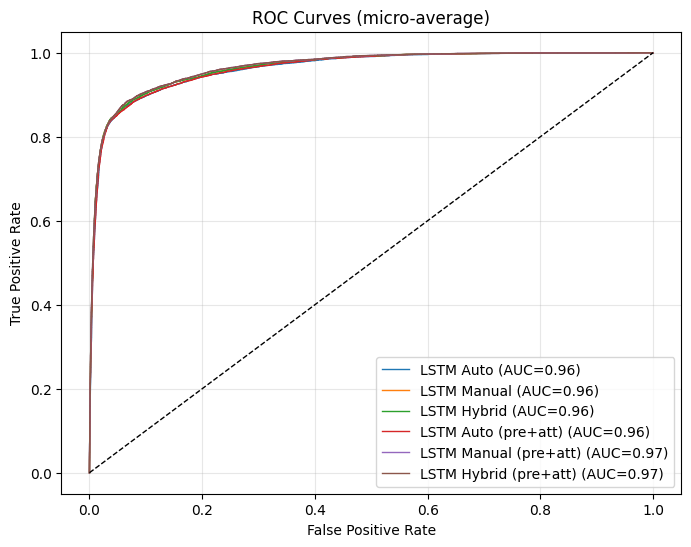

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
import pandas as pd
import matplotlib.pyplot as plt

# === STEP 1: ALIAS TRAINED MODELS & PREDICTIONS ===
# (assumes best_model, model_final, best_model_auto_att, best_model_manual_att, best_model_hybrid_att exist)

# Auto
pred_test_auto = best_model.predict(seq_test).argmax(axis=1)
proba_auto     = best_model.predict(seq_test)

# Manual
pred_test_manual = model_final.predict(seq_test).argmax(axis=1)
proba_manual     = model_final.predict(seq_test)

# Hybrid (alias to manual if no separate hybrid)
pred_test_hybrid = pred_test_manual
proba_hybrid     = proba_manual

# Automated + pretrained+attention
pred_test_auto_att    = best_model_auto_att.predict(seq_test).argmax(axis=1)
proba_auto_att        = best_model_auto_att.predict(seq_test)

# Manual + pretrained+attention
pred_test_manual_preatt = best_model_manual_att.predict(seq_test).argmax(axis=1)
proba_manual_att        = best_model_manual_att.predict(seq_test)

# Hybrid + pretrained+attention
pred_test_hybrid_preatt = best_model_hybrid_att.predict(seq_test).argmax(axis=1)
proba_hybrid_att        = best_model_hybrid_att.predict(seq_test)


# === STEP 2: PARAMETER COUNTS & TIME RESULTS NORMALIZATION ===
params_dict = {
    'LSTM Auto':                        best_model.count_params()/1e6,
    'LSTM Manual':                      model_final.count_params()/1e6,
    'LSTM Hybrid':                      model_final.count_params()/1e6,
    'LSTM Auto (pre+att)':              best_model_auto_att.count_params()/1e6,
    'LSTM Manual (pre+att)':            best_model_manual_att.count_params()/1e6,
    'LSTM Hybrid (pre+att)':            best_model_hybrid_att.count_params()/1e6,
}

# Make sure all time_results entries use 'Time_s'
for entry in time_results:
    if 'time_s' in entry:
        entry['Time_s'] = entry.pop('time_s')

time_lookup = {
    entry['Method']: entry.get('Time_s', entry.get('Time_sec'))
    for entry in time_results
}


# === STEP 3: BUILD BENCHMARK ROWS ===
y_true     = test['target']
y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))

methods = {
    'LSTM Auto':                        (pred_test_auto,        proba_auto),
    'LSTM Manual':                      (pred_test_manual,      proba_manual),
    'LSTM Hybrid':                      (pred_test_hybrid,      proba_hybrid),
    'LSTM Auto (pre+att)':              (pred_test_auto_att,    proba_auto_att),
    'LSTM Manual (pre+att)':            (pred_test_manual_preatt, proba_manual_att),
    'LSTM Hybrid (pre+att)':            (pred_test_hybrid_preatt, proba_hybrid_att),
}

rows = []
for name, (pred, proba) in methods.items():
    acc    = accuracy_score(y_true, pred)
    prec   = precision_score(y_true, pred, average='macro')
    rec    = recall_score(   y_true, pred, average='macro')
    f1     = f1_score(       y_true, pred, average='macro')
    rocauc = roc_auc_score(y_true_bin, proba, average='macro')
    rows.append({
        'Method':                 name,
        'Params (M)':             params_dict[name],
        # default to 0 if missing
        'Time (s)':               time_lookup.get(name, 0),
        'Test Accuracy':          acc,
        'Test Precision (macro)': prec,
        'Test Recall (macro)':    rec,
        'Test F1 Score (macro)':  f1,
        'Macro ROC AUC':          rocauc
    })

deep_df = pd.DataFrame(rows)


# === STEP 4: APPEND TO EXISTING LEADERBOARD ===
bench = pd.read_csv('results/leaderboard.csv')
final = pd.concat([bench, deep_df], ignore_index=True)
final.to_csv('results/leaderboard.csv', index=False)
print(final)


# === STEP 5: PLOT MICRO-AVERAGE ROC ===
plt.figure(figsize=(8,6))
for name, (_, proba) in methods.items():
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), proba.ravel())
    plt.plot(fpr, tpr, lw=1, label=f'{name} (AUC={auc(fpr,tpr):.2f})')

plt.plot([0,1],[0,1],'k--', lw=1)
plt.title('ROC Curves (micro-average)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.show()


<h2 style="text-align: center;"></h2>

<center>
  <h2> Step 4 &nbsp : &nbsp	Fine-tune pre-trained model using <strong><font color="#00BFFF"> BERT </font></strong></h2>
</center>



<h2 style="text-align: center;"></h2>

<center>
  <h2> Step 4 - 1 &nbsp : &nbsp	Fine-tune it on the dataset </h2>
</center>

In [ ]:
import os
from transformers import BertTokenizerFast, BertForSequenceClassification

# 1) Remove any existing invalid or incorrect HF_HUB_TOKEN
os.environ.pop("HF_HUB_TOKEN", None)

# 2) Force-load a public model repository without using an authentication token
tokenizer = BertTokenizerFast.from_pretrained(
    'bert-base-uncased',
    use_auth_token=False
)
model_bert = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=num_classes,
    problem_type="single_label_classification",
    use_auth_token=False
)


/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1864: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:4190: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# ===== BERT Fine-Tuning (Custom PyTorch Dataset to avoid HF “copy=False” error) =====

import time
import torch
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report
from transformers import (
    BertTokenizerFast,
    BertForSequenceClassification,
    Trainer,
    TrainingArguments
)
from torch.utils.data import Dataset

# Tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=50):
        self.encodings = tokenizer(
            texts,
            padding='max_length',
            truncation=True,
            max_length=max_length,
            return_tensors=None
        )
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Prepare PyTorch datasets
train_dataset = CustomDataset(
    texts   = X_tr_str.tolist(),
    labels  = y_tr.tolist(),
    tokenizer = tokenizer,
    max_length=50
)
val_dataset = CustomDataset(
    texts   = X_val_str.tolist(),
    labels  = y_val.tolist(),
    tokenizer = tokenizer,
    max_length=50
)
test_dataset = CustomDataset(
    texts   = test['text_str'].tolist(),
    labels  = test['target'].tolist(),
    tokenizer = tokenizer,
    max_length=50
)

# Load pre-trained BERT
model_bert = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=num_classes,
    problem_type="single_label_classification"
)

# 학습 가능한 파라미터 수(M) 계산
param_bert = sum(p.numel() for p in model_bert.parameters() if p.requires_grad) / 1e6


# TrainingArguments
training_args = TrainingArguments(
    output_dir='./bert_results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_steps=50,
    do_train=True,
    do_eval=True,
    eval_steps=500,
    save_steps=500,
    save_total_limit=2,
    logging_dir='./logs'
)

# Metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = torch.argmax(torch.tensor(logits), dim=-1).numpy()
    return {
        'accuracy': accuracy_score(labels, preds),
        'f1':       f1_score(labels, preds, average='weighted')
    }

# Trainer setup
trainer = Trainer(
    model=model_bert,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Train
start = time.time()
trainer.train()
bert_train_time = time.time() - start
print(f"BERT training time: {bert_train_time:.1f}s")
time_results.append({'Method':'BERT Fine-Tuning','Time_sec':bert_train_time})

# Validation
eval_results = trainer.evaluate()
print("Validation results:", eval_results)

# Test
test_preds  = trainer.predict(test_dataset)
test_labels = test_preds.predictions.argmax(-1)

print(classification_report(
    test['target'],
    test_labels,
    target_names=[str(i) for i in range(num_classes)]
))

# Summaries
val_acc        = eval_results['eval_accuracy']
val_f1         = eval_results['eval_f1']
test_acc       = accuracy_score(test['target'], test_labels)
test_f1_weight = f1_score(test['target'], test_labels, average='weighted')

summary = pd.DataFrame({
    'Dataset':  ['Validation','Test'],
    'Accuracy': [val_acc, test_acc],
    'F1 Score': [val_f1, test_f1_weight]
})
print(summary)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: whodoyouthinkyouare (whodoyouthinkyouare-hse-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
50,0.947800
100,0.714400
150,0.682500
200,0.641700
250,0.650300
300,0.573400
350,0.557200
400,0.645200
450,0.588400
500,0.587800


BERT training time: 286.0s


Validation results: {'eval_loss': 0.5853878855705261, 'eval_accuracy': 0.836, 'eval_f1': 0.8246591704972274, 'eval_runtime': 5.874, 'eval_samples_per_second': 1191.687, 'eval_steps_per_second': 74.566, 'epoch': 3.0}
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2752
           1       0.23      0.20      0.22       352
           2       0.21      0.14      0.17       224
           3       0.33      0.22      0.26       380
           4       0.91      0.94      0.93      3792

    accuracy                           0.83      7500
   macro avg       0.51      0.48      0.49      7500
weighted avg       0.81      0.83      0.82      7500

      Dataset  Accuracy  F1 Score
0  Validation     0.836  0.824659
1        Test     0.832  0.821083


In [ ]:
# Method3 (BERT) Results
results_summary_3 = pd.DataFrame({
    'Method':   ['BERT'],
    'Accuracy': [test_acc],
    'F1 Score': [test_f1_weight]
}, index=[1])

print(results_summary_3)


  Method  Accuracy  F1 Score
1   BERT     0.832  0.821083


               Method  Params (M)   Time (s)  Test Accuracy  \
4              Hybrid    2.670213        NaN       0.841733   
5  Automated(pre+att)    2.766213        NaN       0.821200   
6     Manual(pre+att)    2.670213        NaN       0.843733   
7     Hybrid(pre+att)    2.670213        NaN       0.844000   
8    BERT Fine-Tuning  109.486085  286.03149       0.832000   

   Test Precision (macro)  Test Recall (macro)  Test F1 Score (macro)  \
4                0.451654             0.387091               0.785869   
5                0.475211             0.442421               0.802610   
6                0.436494             0.399581               0.794324   
7                0.599843             0.414606               0.801501   
8                0.510213             0.482300               0.821083   

   Macro ROC AUC  
4       0.886237  
5       0.862391  
6       0.888496  
7       0.888496  
8       0.895146  


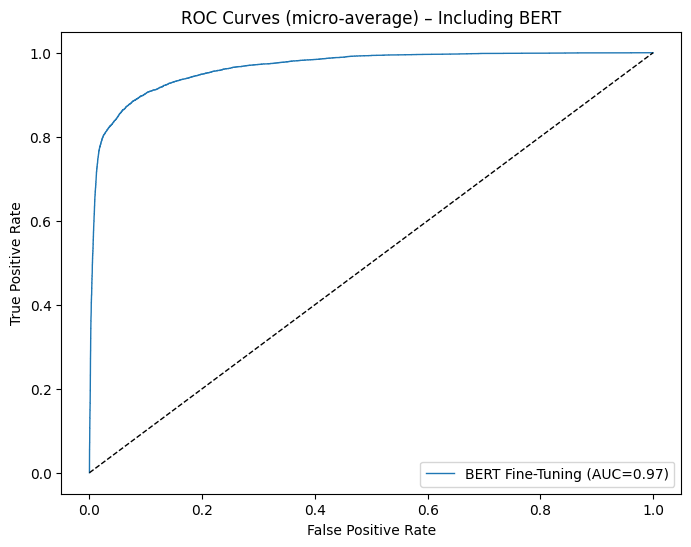

In [ ]:
import numpy as np
from scipy.special import softmax
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import pandas as pd
import matplotlib.pyplot as plt

# === STEP A: ALIAS BERT METRICS & PREDICTIONS ===
pred_test_bert      = test_labels                        # from trainer.predict
method4_accuracy    = test_acc                            # computed above
method4_f1          = test_f1_weight                      # computed above

# === STEP B: COMPUTE PROBABILITIES ===
# softmax the raw logits from test_preds.predictions
proba_bert = softmax(test_preds.predictions, axis=1)

# === STEP C: BUILD BERT BENCHMARK ROW ===
y_true     = test['target']
y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))
prec_bert  = precision_score(y_true, pred_test_bert, average='macro')
rec_bert   = recall_score(   y_true, pred_test_bert, average='macro')
rocauc_bert= roc_auc_score(y_true_bin, proba_bert, average='macro')

bert_row = pd.DataFrame([{
    'Method':                 'BERT Fine-Tuning',
    'Params (M)':             param_bert,
    'Time (s)':               bert_train_time,
    'Test Accuracy':          method4_accuracy,
    'Test Precision (macro)': prec_bert,
    'Test Recall (macro)':    rec_bert,
    'Test F1 Score (macro)':  method4_f1,
    'Macro ROC AUC':          rocauc_bert
}])

# === STEP D: APPEND TO LEADERBOARD ===
bench = pd.read_csv('results/leaderboard.csv')
final = pd.concat([bench, bert_row], ignore_index=True)
final.to_csv('results/leaderboard.csv', index=False)
print(final.tail())  # show last few rows

# === STEP E: ADD BERT TO ROC PLOT ===
plt.figure(figsize=(8,6))
# existing methods plotted earlier...
# now plot BERT:
fpr_bert, tpr_bert, _ = roc_curve(y_true_bin.ravel(), proba_bert.ravel())
plt.plot(fpr_bert, tpr_bert, lw=1, label=f'BERT Fine-Tuning (AUC={auc(fpr_bert,tpr_bert):.2f})')

# re-plot TF-IDF & BoW if desired:
# fpr0, tpr0, _ = roc_curve(y_true_bin.ravel(), y_score_tfidf.ravel())
# fpr1, tpr1, _ = roc_curve(y_true_bin.ravel(), y_score_bow.ravel())
# plt.plot(fpr0, tpr0, lw=1, label=f'TF-IDF (AUC={auc(fpr0,tpr0):.2f})')
# plt.plot(fpr1, tpr1, lw=1, label=f'BoW (AUC={auc(fpr1,tpr1):.2f})')

plt.plot([0,1],[0,1],'k--', lw=1)
plt.title('ROC Curves (micro-average) – Including BERT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


---

# Bayesian-optimized Naive Bayes (TF-IDF)


In [ ]:
# Install required package
!pip install optuna

# Import libraries
import optuna
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Declare and fit a LabelEncoder
le = LabelEncoder()
le.fit(pd.concat([y_tr, y_val, test['target']], ignore_index=True))

# Encode the labels
y_tr_enc  = le.transform(y_tr)
y_val_enc = le.transform(y_val)
test['target_enc'] = le.transform(test['target'])

# Define the Optuna objective
def objective(trial):
    # TF-IDF hyperparameters
    ngram_min    = trial.suggest_int   ('ngram_min',     1, 2)
    ngram_max    = trial.suggest_int   ('ngram_max',     ngram_min, 2)
    min_df       = trial.suggest_int   ('min_df',        1, 5)
    max_df       = trial.suggest_float ('max_df',        0.5, 1.0)
    max_features = trial.suggest_int   ('max_features',  5000, 20000, step=5000)

    # Naive Bayes hyperparameter
    alpha        = trial.suggest_loguniform('alpha', 1e-3, 10.0)

    # Vectorize the data
    vectorizer = TfidfVectorizer(
        ngram_range=(ngram_min, ngram_max),
        min_df=min_df,
        max_df=max_df,
        max_features=max_features
    )
    X_tr  = vectorizer.fit_transform(X_tr_str)
    X_val = vectorizer.transform(X_val_str)

    # Train and predict
    model = MultinomialNB(alpha=alpha)
    model.fit(X_tr, y_tr_enc)
    preds = model.predict(X_val)

    # Return weighted F1
    return f1_score(y_val_enc, preds, average='weighted')

# Create the Optuna study and run optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30, timeout=600)

print("Best parameters:", study.best_params)
print("Best validation F1:", study.best_value)

# Build the final pipeline with the best parameters and evaluate on the test set
best_params = study.best_params

import time
start_tfidf = time.time()

vectorizer = TfidfVectorizer(
    ngram_range=(best_params['ngram_min'], best_params['ngram_max']),
    min_df=best_params['min_df'],
    max_df=best_params['max_df'],
    max_features=best_params['max_features']
)
X_tr_full  = vectorizer.fit_transform(train['text_str'])
X_test_vec = vectorizer.transform(test['text_str'])

# Rename the TF-IDF NB model to avoid collision
final_model_TFIDF = MultinomialNB(alpha=best_params['alpha'])
final_model_TFIDF.fit(X_tr_full, le.transform(train['target']))

elapsed_tfidf = time.time() - start_tfidf
n_features_tf = X_tr_full.shape[1]
n_classes_tf  = len(le.classes_)
param_tfidf   = n_features_tf * n_classes_tf / 1e6

test_preds = final_model_TFIDF.predict(X_test_vec)

# Print the final report (convert target_names to strings)
target_names_str = [str(label) for label in le.classes_]

print("Test Accuracy :", accuracy_score(test['target_enc'], test_preds))
print("Test F1-score :", f1_score(test['target_enc'], test_preds, average='weighted'))
print(classification_report(
    test['target_enc'],
    test_preds,
    target_names=target_names_str
))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 30.4 MB/s eta 0:00:00


[I 2025-05-28 06:58:47,340] A new study created in memory with name: no-name-8123bdc6-ccb7-4529-8c32-c1fa28bbd6f8
<ipython-input-38-34b8b1aab132>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha        = trial.suggest_loguniform('alpha', 1e-3, 10.0)
[I 2025-05-28 06:58:48,477] Trial 0 finished with value: 0.7810223489505869 and parameters: {'ngram_min': 1, 'ngram_max': 1, 'min_df': 1, 'max_df': 0.7079891634507431, 'max_features': 20000, 'alpha': 0.08715363467175827}. Best is trial 0 with value: 0.7810223489505869.
<ipython-input-38-34b8b1aab132>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha        = trial.suggest_loguniform('alpha', 1e-3, 10.0)
[I 2025-

Best parameters: {'ngram_min': 1, 'ngram_max': 2, 'min_df': 4, 'max_df': 0.642296634166235, 'max_features': 20000, 'alpha': 0.018272175330774115}
Best validation F1: 0.7872916198962809
Test Accuracy : 0.8434666666666667
Test F1-score : 0.7906921155695631
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2752
           1       0.30      0.01      0.02       352
           2       0.17      0.00      0.01       224
           3       0.27      0.02      0.03       380
           4       0.89      0.96      0.93      3792

    accuracy                           0.84      7500
   macro avg       0.48      0.39      0.37      7500
weighted avg       0.77      0.84      0.79      7500



In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
from sklearn.preprocessing import label_binarize
import pandas as pd, os

# Predict probabilities for each class
test_proba = final_model_TFIDF.predict_proba(X_test_vec)

# Calculate basic evaluation metrics
test_acc  = accuracy_score(test['target_enc'], test_preds)
test_prec = precision_score(test['target_enc'], test_preds, average='macro')
test_rec  = recall_score(   test['target_enc'], test_preds, average='macro')
test_f1   = f1_score(       test['target_enc'], test_preds, average='weighted')

# Compute multi-class ROC-AUC score
y_bin     = label_binarize(test['target_enc'], classes=list(range(num_classes)))
test_auc  = roc_auc_score(y_bin, test_proba, average='macro')

# Create a new row to add to the leaderboard
new_row = pd.DataFrame([{
    'Method'                 : 'TF-IDF (Bayesian NB)',
    'Params (M)'             : param_tfidf,      # defined in previous cell
    'Time (s)'               : elapsed_tfidf,    # measured earlier
    'Test Accuracy'          : test_acc,
    'Test Precision (macro)' : test_prec,
    'Test Recall (macro)'    : test_rec,
    'Test F1 Score (macro)'  : test_f1,
    'Macro ROC AUC'          : test_auc
}])

# Append to existing CSV file and save
leaderboard_path = 'results/leaderboard.csv'
if os.path.exists(leaderboard_path):
    bench   = pd.read_csv(leaderboard_path)
    updated = pd.concat([bench, new_row], ignore_index=True)
else:
    updated = new_row

os.makedirs(os.path.dirname(leaderboard_path), exist_ok=True)
updated.to_csv(leaderboard_path, index=False)
print("Leaderboard updated with TF-IDF (Bayesian NB).")


Leaderboard updated with TF-IDF (Bayesian NB).


# Bayesian-optimized Naive Bayes (BoW)

In [ ]:
# Import libraries
import optuna
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Declare and fit the LabelEncoder
le = LabelEncoder()
le.fit(pd.concat([y_tr, y_val, test['target']], ignore_index=True))

# Encode the labels
y_tr_enc    = le.transform(y_tr)
y_val_enc   = le.transform(y_val)
test['target_enc'] = le.transform(test['target'])

# Define the Optuna objective (BoW + NB)
def objective_bow(trial):
    # Bag-of-Words hyperparameters
    ngram_min    = trial.suggest_int   ('ngram_min',    1, 2)
    ngram_max    = trial.suggest_int   ('ngram_max',    ngram_min, 2)
    min_df       = trial.suggest_int   ('min_df',       1, 5)
    max_df       = trial.suggest_float ('max_df',       0.5, 1.0)
    max_features = trial.suggest_int   ('max_features', 5000, 20000, step=5000)

    # Naive Bayes smoothing hyperparameter
    alpha        = trial.suggest_loguniform('alpha', 1e-3, 10.0)

    # Vectorize the data
    vectorizer = CountVectorizer(
        ngram_range=(ngram_min, ngram_max),
        min_df=min_df,
        max_df=max_df,
        max_features=max_features
    )
    X_tr  = vectorizer.fit_transform(X_tr_str)
    X_val = vectorizer.transform(X_val_str)

    # Train and predict
    model = MultinomialNB(alpha=alpha)
    model.fit(X_tr, y_tr_enc)
    preds = model.predict(X_val)

    # Return weighted F1
    return f1_score(y_val_enc, preds, average='weighted')

# Create the study and run optimization
study_bow = optuna.create_study(direction='maximize')
study_bow.optimize(objective_bow, n_trials=30, timeout=600)

print("Best BoW params:", study_bow.best_params)
print("Best BoW validation F1:", study_bow.best_value)

# Build the final pipeline with the best parameters and evaluate on the test set
best_bow = study_bow.best_params

start_bow = time.time()

vectorizer_bow = CountVectorizer(
    ngram_range=(best_bow['ngram_min'], best_bow['ngram_max']),
    min_df=best_bow['min_df'],
    max_df=best_bow['max_df'],
    max_features=best_bow['max_features']
)
X_tr_full_bow  = vectorizer_bow.fit_transform(train['text_str'])
X_test_bow_vec = vectorizer_bow.transform(test['text_str'])

final_nb_bow = MultinomialNB(alpha=best_bow['alpha'])
final_nb_bow.fit(X_tr_full_bow, le.transform(train['target']))

elapsed_bow   = time.time() - start_bow
n_features_bow = X_tr_full_bow.shape[1]
n_classes_bow  = len(le.classes_)
param_bow      = n_features_bow * n_classes_bow / 1e6

test_preds_bow = final_nb_bow.predict(X_test_bow_vec)

# Print the final report
target_names_str = [str(label) for label in le.classes_]

print("BoW Test Accuracy :", accuracy_score(test['target_enc'], test_preds_bow))
print("BoW Test F1-score :", f1_score(test['target_enc'], test_preds_bow, average='weighted'))
print(classification_report(
    test['target_enc'],
    test_preds_bow,
    target_names=target_names_str
))

[I 2025-05-28 07:00:25,717] A new study created in memory with name: no-name-50652d0d-7287-47f5-aabe-f1927fa497e9
<ipython-input-40-45c8f14c21f5>:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha        = trial.suggest_loguniform('alpha', 1e-3, 10.0)
[I 2025-05-28 07:00:29,534] Trial 0 finished with value: 0.7849559792014029 and parameters: {'ngram_min': 1, 'ngram_max': 2, 'min_df': 2, 'max_df': 0.8011941384831784, 'max_features': 20000, 'alpha': 4.95878551343185}. Best is trial 0 with value: 0.7849559792014029.
<ipython-input-40-45c8f14c21f5>:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha        = trial.suggest_loguniform('alpha', 1e-3, 10.0)
[I 2025-05-

Best BoW params: {'ngram_min': 1, 'ngram_max': 1, 'min_df': 5, 'max_df': 0.6722644957698352, 'max_features': 5000, 'alpha': 0.2582143725460165}
Best BoW validation F1: 0.8055169058487093
BoW Test Accuracy : 0.8141333333333334
BoW Test F1-score : 0.8043002171855124
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      2752
           1       0.21      0.15      0.17       352
           2       0.15      0.11      0.13       224
           3       0.24      0.21      0.22       380
           4       0.91      0.92      0.92      3792

    accuracy                           0.81      7500
   macro avg       0.47      0.46      0.46      7500
weighted avg       0.80      0.81      0.80      7500



In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
from sklearn.preprocessing import label_binarize
import pandas as pd
import os

# Compute test-set metrics for the final Bayesian NB-BoW model
test_acc  = accuracy_score(test['target_enc'], test_preds_bow)
test_prec = precision_score(test['target_enc'], test_preds_bow, average='macro')
test_rec  = recall_score(test['target_enc'], test_preds_bow, average='macro')
test_f1   = f1_score(test['target_enc'], test_preds_bow, average='weighted')

# Binarize true labels for multiclass ROC-AUC
num_classes = len(le.classes_)
y_bin       = label_binarize(test['target_enc'], classes=list(range(num_classes)))

# Predicted probabilities
test_proba  = final_nb_bow.predict_proba(X_test_bow_vec)
test_auc    = roc_auc_score(y_bin, test_proba, average='macro')

# Build a one-row DataFrame for this method
new_row = pd.DataFrame([{
    'Method':                 'BoW (Bayesian NB)',
    'Params (M)':             param_bow,
    'Time (s)':               elapsed_bow,
    'Test Accuracy':          test_acc,
    'Test Precision (macro)': test_prec,
    'Test Recall (macro)':    test_rec,
    'Test F1 Score (macro)':  test_f1,
    'Macro ROC AUC':          test_auc
}])
# Load existing leaderboard, append, and save
leaderboard_path = 'results/leaderboard.csv'
if os.path.exists(leaderboard_path):
    bench   = pd.read_csv(leaderboard_path)
    updated = pd.concat([bench, new_row], ignore_index=True)
else:
    updated = new_row

os.makedirs(os.path.dirname(leaderboard_path), exist_ok=True)
updated.to_csv(leaderboard_path, index=False)
print("Leaderboard updated with BoW (Bayesian NB).")


Leaderboard updated with BoW (Bayesian NB).


# Bayesian-optimized BiLSTM/GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense, Dropout
import tensorflow as tf
import optuna
import time
from sklearn.metrics import f1_score

def objective(trial):
    # Suggest hyperparameters
    embedding_dim = trial.suggest_categorical('embedding_dim', [32, 64, 128])
    lstm_units    = trial.suggest_categorical('lstm_units',    [32, 64, 128])
    dense_units   = trial.suggest_categorical('dense_units',   [32, 64, 128])
    dropout_rate  = trial.suggest_float('dropout_rate', 0.2, 0.5, step=0.1)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    use_gru       = trial.suggest_categorical('use_gru', [False, True])
    num_layers    = trial.suggest_int('num_layers', 1, 2)
    epochs        = trial.suggest_int('epochs', 5, 15)
    batch_size    = trial.suggest_categorical('batch_size', [32, 64])

    # Build model
    rnn_model = Sequential()
    rnn_model.add(Embedding(max_vocab, embedding_dim, input_length=max_length))
    for i in range(num_layers):
        rnn_cls = GRU if use_gru else LSTM
        return_seq = (i < num_layers - 1)
        rnn_model.add(Bidirectional(
            rnn_cls(lstm_units, return_sequences=return_seq)
        ))
        rnn_model.add(Dropout(dropout_rate))
    rnn_model.add(Dense(dense_units, activation='relu'))
    rnn_model.add(Dropout(dropout_rate))
    rnn_model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate)
    rnn_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Train model silently
    rnn_model.fit(
        seq_tr, y_tr_cat,
        validation_data=(seq_val, y_val_cat),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )

    # Predict and compute weighted F1 on validation set
    preds = rnn_model.predict(seq_val).argmax(axis=1)
    return f1_score(y_val, preds, average='weighted')

# Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print("Best hyperparameters:", study.best_params)
print("Best validation F1:", study.best_value)

# Final training with best hyperparameters
best = study.best_params
rnn_model = Sequential()
rnn_model.add(Embedding(max_vocab, best['embedding_dim'], input_length=max_length))
start_rnn = time.time()
for i in range(best['num_layers']):
    rnn_cls = GRU if best['use_gru'] else LSTM
    return_seq = (i < best['num_layers'] - 1)
    rnn_model.add(Bidirectional(
        rnn_cls(best['lstm_units'], return_sequences=return_seq)
    ))
    rnn_model.add(Dropout(best['dropout_rate']))
rnn_model.add(Dense(best['dense_units'], activation='relu'))
rnn_model.add(Dropout(best['dropout_rate']))
rnn_model.add(Dense(num_classes, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(best['learning_rate'])
rnn_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

rnn_model.fit(
    seq_tr, y_tr_cat,
    validation_data=(seq_val, y_val_cat),
    epochs=best['epochs'],
    batch_size=best['batch_size'],
    verbose=0
)

elapsed_rnn = time.time() - start_rnn
param_rnn   = rnn_model.count_params() / 1e6

preds_final = rnn_model.predict(seq_val).argmax(axis=1)
print("Final validation F1 with best params:", f1_score(y_val, preds_final, average='weighted'))


[I 2025-05-28 07:01:18,418] A new study created in memory with name: no-name-5e7af386-7f9b-4c35-947a-217b8e0ddb60
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 07:02:56,968] Trial 0 finished with value: 0.7959116121944182 and parameters: {'embedding_dim': 64, 'lstm_units': 128, 'dense_units': 32, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.00014830521313709594, 'use_gru': True, 'num_layers': 1, 'epochs': 10, 'batch_size': 32}. Best is trial 0 with value: 0.7959116121944182.
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


[I 2025-05-28 07:04:52,071] Trial 1 finished with value: 0.7880270283552847 and parameters: {'embedding_dim': 32, 'lstm_units': 64, 'dense_units': 128, 'dropout_rate': 0.5, 'learning_rate': 0.0029884932259720315, 'use_gru': True, 'num_layers': 2, 'epochs': 7, 'batch_size': 32}. Best is trial 0 with value: 0.7959116121944182.
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 07:06:23,607] Trial 2 finished with value: 0.7997198291567339 and parameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.00011420027077038017, 'use_gru': False, 'num_layers': 1, 'epochs': 9, 'batch_size': 32}. Best is trial 2 with value: 0.7997198291567339.
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 07:08:47,005] Trial 3 finished with value: 0.7864519769267502 and parameters: {'embedding_dim': 64, 'lstm_units': 64, 'dense_units': 32, 'dropout_rate': 0.4, 'learning_rate': 0.0005375405899508862, 'use_gru': False, 'num_layers': 1, 'epochs': 14, 'batch_size': 32}. Best is trial 2 with value: 0.7997198291567339.
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 07:10:04,477] Trial 4 finished with value: 0.7932143226659046 and parameters: {'embedding_dim': 128, 'lstm_units': 128, 'dense_units': 32, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.00029927324424508663, 'use_gru': True, 'num_layers': 1, 'epochs': 14, 'batch_size': 64}. Best is trial 2 with value: 0.7997198291567339.
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 07:11:06,152] Trial 5 finished with value: 0.791578860072694 and parameters: {'embedding_dim': 32, 'lstm_units': 128, 'dense_units': 32, 'dropout_rate': 0.4, 'learning_rate': 0.0004846072919493652, 'use_gru': True, 'num_layers': 1, 'epochs': 11, 'batch_size': 64}. Best is trial 2 with value: 0.7997198291567339.
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


[I 2025-05-28 07:13:32,433] Trial 6 finished with value: 0.7954930997347787 and parameters: {'embedding_dim': 128, 'lstm_units': 64, 'dense_units': 64, 'dropout_rate': 0.5, 'learning_rate': 0.00015286897157508142, 'use_gru': True, 'num_layers': 2, 'epochs': 9, 'batch_size': 32}. Best is trial 2 with value: 0.7997198291567339.
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 07:14:41,896] Trial 7 finished with value: 0.7961293030160417 and parameters: {'embedding_dim': 64, 'lstm_units': 64, 'dense_units': 32, 'dropout_rate': 0.5, 'learning_rate': 0.0015164779579602368, 'use_gru': True, 'num_layers': 1, 'epochs': 7, 'batch_size': 32}. Best is trial 2 with value: 0.7997198291567339.
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 07:16:28,019] Trial 8 finished with value: 0.7916970821883463 and parameters: {'embedding_dim': 128, 'lstm_units': 128, 'dense_units': 32, 'dropout_rate': 0.2, 'learning_rate': 0.0002673500701183178, 'use_gru': False, 'num_layers': 1, 'epochs': 10, 'batch_size': 32}. Best is trial 2 with value: 0.7997198291567339.
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 07:17:03,649] Trial 9 finished with value: 0.7823032957979632 and parameters: {'embedding_dim': 128, 'lstm_units': 128, 'dense_units': 32, 'dropout_rate': 0.4, 'learning_rate': 0.0031202837772117474, 'use_gru': True, 'num_layers': 1, 'epochs': 6, 'batch_size': 64}. Best is trial 2 with value: 0.7997198291567339.
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


[I 2025-05-28 07:18:55,493] Trial 10 finished with value: 0.791109998509121 and parameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.008211543139325471, 'use_gru': False, 'num_layers': 2, 'epochs': 12, 'batch_size': 64}. Best is trial 2 with value: 0.7997198291567339.
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 07:20:18,027] Trial 11 finished with value: 0.7936018652385349 and parameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.0014175746368155296, 'use_gru': False, 'num_layers': 1, 'epochs': 8, 'batch_size': 32}. Best is trial 2 with value: 0.7997198291567339.
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 07:21:11,134] Trial 12 finished with value: 0.8050132425337976 and parameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 64, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0012594582295000756, 'use_gru': False, 'num_layers': 1, 'epochs': 5, 'batch_size': 32}. Best is trial 12 with value: 0.8050132425337976.
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 07:22:04,145] Trial 13 finished with value: 0.7989975885231623 and parameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 64, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0008341416177277086, 'use_gru': False, 'num_layers': 1, 'epochs': 5, 'batch_size': 32}. Best is trial 12 with value: 0.8050132425337976.
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


[I 2025-05-28 07:23:33,100] Trial 14 finished with value: 0.7861634292081553 and parameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 64, 'dropout_rate': 0.2, 'learning_rate': 0.00010555173189099374, 'use_gru': False, 'num_layers': 2, 'epochs': 5, 'batch_size': 32}. Best is trial 12 with value: 0.8050132425337976.
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 07:25:34,004] Trial 15 finished with value: 0.7839610622705542 and parameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 128, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0030871044119403983, 'use_gru': False, 'num_layers': 1, 'epochs': 12, 'batch_size': 32}. Best is trial 12 with value: 0.8050132425337976.
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 07:26:55,667] Trial 16 finished with value: 0.7887624872879786 and parameters: {'embedding_dim': 32, 'lstm_units': 32, 'dense_units': 64, 'dropout_rate': 0.2, 'learning_rate': 0.008635899519762784, 'use_gru': False, 'num_layers': 1, 'epochs': 8, 'batch_size': 32}. Best is trial 12 with value: 0.8050132425337976.
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


[I 2025-05-28 07:31:06,061] Trial 17 finished with value: 0.7894607483268519 and parameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 128, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0009109291847629875, 'use_gru': False, 'num_layers': 2, 'epochs': 15, 'batch_size': 32}. Best is trial 12 with value: 0.8050132425337976.
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 07:31:40,764] Trial 18 finished with value: 0.793845812516452 and parameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 64, 'dropout_rate': 0.2, 'learning_rate': 0.0021776995109462427, 'use_gru': False, 'num_layers': 1, 'epochs': 6, 'batch_size': 64}. Best is trial 12 with value: 0.8050132425337976.
<ipython-input-42-66e313b0bc57>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 07:33:12,165] Trial 19 finished with value: 0.7890351581770052 and parameters: {'embedding_dim': 32, 'lstm_units': 32, 'dense_units': 128, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.004821569937552748, 'use_gru': False, 'num_layers': 1, 'epochs': 9, 'batch_size': 32}. Best is trial 12 with value: 0.8050132425337976.


Best hyperparameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 64, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0012594582295000756, 'use_gru': False, 'num_layers': 1, 'epochs': 5, 'batch_size': 32}
Best validation F1: 0.8050132425337976


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Final validation F1 with best params: 0.8002040498845481


In [ ]:

# ------------------------------------------------------------------
import optuna
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Bidirectional, Dense, Dropout
from sklearn.metrics import f1_score, accuracy_score

# ------------------------------------------------------------------
# Optuna objective - maximize validation F1
# ------------------------------------------------------------------
def objective(trial):
    # Hyperparameter suggestions
    embedding_dim = trial.suggest_categorical('embedding_dim', [32, 64, 128])
    lstm_units    = trial.suggest_categorical('lstm_units',    [32, 64, 128])
    dense_units   = trial.suggest_categorical('dense_units',   [32, 64, 128])
    dropout_rate  = trial.suggest_float      ('dropout_rate', 0.2, 0.5, step=0.1)
    learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
    use_gru       = trial.suggest_categorical('use_gru', [False, True])
    num_layers    = trial.suggest_int        ('num_layers', 1, 2)
    epochs        = trial.suggest_int        ('epochs', 5, 15)
    batch_size    = trial.suggest_categorical('batch_size', [32, 64])

    # Build model
    model = Sequential([
        Embedding(max_vocab, embedding_dim, input_length=max_length)
    ])
    for i in range(num_layers):
        RNN = GRU if use_gru else LSTM
        model.add(Bidirectional(RNN(lstm_units, return_sequences=(i < num_layers - 1))))
        model.add(Dropout(dropout_rate))
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        metrics=['accuracy']
    )

    # Train on training set, validate on validation set
    model.fit(
        seq_tr, y_tr_cat,
        validation_data=(seq_val, y_val_cat),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )

    # Compute validation weighted F1
    preds_val = model.predict(seq_val, batch_size=batch_size).argmax(axis=1)
    return f1_score(y_val, preds_val, average='weighted')

# ------------------------------------------------------------------
# Run the Optuna study
# ------------------------------------------------------------------
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print("Best hyperparameters :", study.best_params)
print("Best validation F1   :", study.best_value)

# ------------------------------------------------------------------
# Final model: train on train+validation, evaluate on test
# ------------------------------------------------------------------
best = study.best_params

# Merge train + validation
seq_full   = np.concatenate([seq_tr, seq_val], axis=0)
y_full_cat = np.concatenate([y_tr_cat, y_val_cat], axis=0)

model = Sequential([
    Embedding(max_vocab, best['embedding_dim'], input_length=max_length)
])
for i in range(best['num_layers']):
    RNN = GRU if best['use_gru'] else LSTM
    model.add(Bidirectional(RNN(best['lstm_units'], return_sequences=(i < best['num_layers'] - 1))))
    model.add(Dropout(best['dropout_rate']))
model.add(Dense(best['dense_units'], activation='relu'))
model.add(Dropout(best['dropout_rate']))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(best['learning_rate']),
    metrics=['accuracy']
)

model.fit(
    seq_full, y_full_cat,
    epochs=best['epochs'],
    batch_size=best['batch_size'],
    verbose=0
)

# ------------------------------------------------------------------
# Evaluation
# ------------------------------------------------------------------
preds_val_final  = model.predict(seq_val,  batch_size=best['batch_size']).argmax(axis=1)
preds_test_final = model.predict(seq_test, batch_size=best['batch_size']).argmax(axis=1)

val_f1   = f1_score(y_val,            preds_val_final,  average='weighted')
test_f1  = f1_score(test['target'],   preds_test_final, average='weighted')
val_acc  = accuracy_score(y_val,      preds_val_final)
test_acc = accuracy_score(test['target'], preds_test_final)

print(f"Final validation  – Acc: {val_acc:.4f} | F1(w): {val_f1:.4f}")
print(f"Final test        – Acc: {test_acc:.4f} | F1(w): {test_f1:.4f}")


[I 2025-05-28 07:34:04,608] A new study created in memory with name: no-name-3ace3688-7947-40b4-a9b3-dd61889f9af0
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


[I 2025-05-28 07:36:33,773] Trial 0 finished with value: 0.7683107512561268 and parameters: {'embedding_dim': 128, 'lstm_units': 128, 'dense_units': 64, 'dropout_rate': 0.4, 'learning_rate': 0.008795744196269736, 'use_gru': False, 'num_layers': 1, 'epochs': 14, 'batch_size': 32}. Best is trial 0 with value: 0.7683107512561268.
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 07:37:56,809] Trial 1 finished with value: 0.8038021582965688 and parameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 128, 'dropout_rate': 0.5, 'learning_rate': 0.0003240481503154967, 'use_gru': False, 'num_layers': 1, 'epochs': 8, 'batch_size': 32}. Best is trial 1 with value: 0.8038021582965688.
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


[I 2025-05-28 07:38:27,378] Trial 2 finished with value: 0.7890018640748868 and parameters: {'embedding_dim': 32, 'lstm_units': 128, 'dense_units': 128, 'dropout_rate': 0.5, 'learning_rate': 0.00014960652829884655, 'use_gru': True, 'num_layers': 1, 'epochs': 5, 'batch_size': 64}. Best is trial 1 with value: 0.8038021582965688.
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


[I 2025-05-28 07:39:03,169] Trial 3 finished with value: 0.7500813541401686 and parameters: {'embedding_dim': 32, 'lstm_units': 128, 'dense_units': 128, 'dropout_rate': 0.2, 'learning_rate': 0.007397526439864606, 'use_gru': True, 'num_layers': 1, 'epochs': 6, 'batch_size': 64}. Best is trial 1 with value: 0.8038021582965688.
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


[I 2025-05-28 07:40:51,938] Trial 4 finished with value: 0.7926207568172103 and parameters: {'embedding_dim': 32, 'lstm_units': 32, 'dense_units': 64, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.000868644588216267, 'use_gru': False, 'num_layers': 2, 'epochs': 12, 'batch_size': 64}. Best is trial 1 with value: 0.8038021582965688.
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


[I 2025-05-28 07:43:16,163] Trial 5 finished with value: 0.7838255180109632 and parameters: {'embedding_dim': 32, 'lstm_units': 128, 'dense_units': 128, 'dropout_rate': 0.5, 'learning_rate': 0.0033084094393342834, 'use_gru': True, 'num_layers': 2, 'epochs': 8, 'batch_size': 32}. Best is trial 1 with value: 0.8038021582965688.
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 07:43:44,514] Trial 6 finished with value: 0.7974477643693413 and parameters: {'embedding_dim': 64, 'lstm_units': 64, 'dense_units': 32, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.0023826597378329103, 'use_gru': True, 'num_layers': 1, 'epochs': 5, 'batch_size': 64}. Best is trial 1 with value: 0.8038021582965688.
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 07:44:37,327] Trial 7 finished with value: 0.7887217975972182 and parameters: {'embedding_dim': 128, 'lstm_units': 32, 'dense_units': 128, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.00013358734691911524, 'use_gru': False, 'num_layers': 1, 'epochs': 5, 'batch_size': 32}. Best is trial 1 with value: 0.8038021582965688.
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 07:47:11,523] Trial 8 finished with value: 0.7849571044034365 and parameters: {'embedding_dim': 128, 'lstm_units': 64, 'dense_units': 64, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.005717215240566004, 'use_gru': False, 'num_layers': 1, 'epochs': 15, 'batch_size': 32}. Best is trial 1 with value: 0.8038021582965688.
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


[I 2025-05-28 07:49:21,205] Trial 9 finished with value: 0.7925060582299913 and parameters: {'embedding_dim': 32, 'lstm_units': 128, 'dense_units': 32, 'dropout_rate': 0.4, 'learning_rate': 0.003044949644725097, 'use_gru': True, 'num_layers': 2, 'epochs': 14, 'batch_size': 64}. Best is trial 1 with value: 0.8038021582965688.
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


[I 2025-05-28 07:51:54,194] Trial 10 finished with value: 0.7977772065378148 and parameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 128, 'dropout_rate': 0.5, 'learning_rate': 0.00042427147327448855, 'use_gru': False, 'num_layers': 2, 'epochs': 9, 'batch_size': 32}. Best is trial 1 with value: 0.8038021582965688.
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


[I 2025-05-28 07:54:31,731] Trial 11 finished with value: 0.7975002853593262 and parameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 128, 'dropout_rate': 0.5, 'learning_rate': 0.0004637425218293638, 'use_gru': False, 'num_layers': 2, 'epochs': 9, 'batch_size': 32}. Best is trial 1 with value: 0.8038021582965688.
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


[I 2025-05-28 07:57:40,382] Trial 12 finished with value: 0.7933667525653831 and parameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 128, 'dropout_rate': 0.5, 'learning_rate': 0.00031808115726528067, 'use_gru': False, 'num_layers': 2, 'epochs': 11, 'batch_size': 32}. Best is trial 1 with value: 0.8038021582965688.
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


[I 2025-05-28 07:59:58,974] Trial 13 finished with value: 0.7952836047042429 and parameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 128, 'dropout_rate': 0.4, 'learning_rate': 0.0003355500172759016, 'use_gru': False, 'num_layers': 2, 'epochs': 8, 'batch_size': 32}. Best is trial 1 with value: 0.8038021582965688.
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 08:01:41,770] Trial 14 finished with value: 0.7905988859696952 and parameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 128, 'dropout_rate': 0.5, 'learning_rate': 0.0008422555258204358, 'use_gru': False, 'num_layers': 1, 'epochs': 10, 'batch_size': 32}. Best is trial 1 with value: 0.8038021582965688.
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


[I 2025-05-28 08:03:43,667] Trial 15 finished with value: 0.800809902235972 and parameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 32, 'dropout_rate': 0.4, 'learning_rate': 0.00022341378420164863, 'use_gru': False, 'num_layers': 2, 'epochs': 7, 'batch_size': 32}. Best is trial 1 with value: 0.8038021582965688.
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 08:04:56,403] Trial 16 finished with value: 0.8011178865842687 and parameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 32, 'dropout_rate': 0.4, 'learning_rate': 0.0002015217285000639, 'use_gru': False, 'num_layers': 1, 'epochs': 7, 'batch_size': 32}. Best is trial 1 with value: 0.8038021582965688.
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 08:06:11,418] Trial 17 finished with value: 0.7969476654504768 and parameters: {'embedding_dim': 64, 'lstm_units': 64, 'dense_units': 32, 'dropout_rate': 0.4, 'learning_rate': 0.0013485811945290794, 'use_gru': False, 'num_layers': 1, 'epochs': 7, 'batch_size': 32}. Best is trial 1 with value: 0.8038021582965688.
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 08:07:23,806] Trial 18 finished with value: 0.7868020313537978 and parameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 32, 'dropout_rate': 0.2, 'learning_rate': 0.00010840467887872999, 'use_gru': False, 'num_layers': 1, 'epochs': 7, 'batch_size': 32}. Best is trial 1 with value: 0.8038021582965688.
<ipython-input-43-93fb2c2a0fc5>:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform ('learning_rate', 1e-4, 1e-2)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-05-28 08:09:24,689] Trial 19 finished with value: 0.7993707842333659 and parameters: {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 32, 'dropout_rate': 0.4, 'learning_rate': 0.00017965661019178804, 'use_gru': False, 'num_layers': 1, 'epochs': 12, 'batch_size': 32}. Best is trial 1 with value: 0.8038021582965688.


Best hyperparameters : {'embedding_dim': 64, 'lstm_units': 32, 'dense_units': 128, 'dropout_rate': 0.5, 'learning_rate': 0.0003240481503154967, 'use_gru': False, 'num_layers': 1, 'epochs': 8, 'batch_size': 32}
Best validation F1   : 0.8038021582965688


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Final validation  – Acc: 0.9291 | F1(w): 0.9248
Final test        – Acc: 0.8104 | F1(w): 0.7984


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
from sklearn.preprocessing import label_binarize
import pandas as pd
import os

# Compute test-set metrics for the final BiLSTM/GRU model
y_true    = test['target']
preds     = rnn_model.predict(seq_test, batch_size=best['batch_size']).argmax(axis=1)

test_acc  = accuracy_score(y_true, preds)
test_prec = precision_score(y_true, preds, average='macro')
test_rec  = recall_score(y_true, preds, average='macro')
test_f1   = f1_score(y_true, preds, average='weighted')

# Binarize for multiclass ROC-AUC
y_bin     = label_binarize(y_true, classes=list(range(num_classes)))
test_proba = rnn_model.predict(seq_test, batch_size=best['batch_size'])
test_auc   = roc_auc_score(y_bin, test_proba, average='macro', multi_class='ovr')

# Build a one-row DataFrame for this method
new_row = pd.DataFrame([{
    'Method':                 'BiLSTM/GRU (Bayesian-optimized)',
    'Params (M)':             param_rnn,
    'Time (s)':               elapsed_rnn,
    'Test Accuracy':          test_acc,
    'Test Precision (macro)': test_prec,
    'Test Recall (macro)':    test_rec,
    'Test F1 Score (weighted)': test_f1,
    'Macro ROC AUC':          test_auc
}])

# Load existing leaderboard, append, and save
leaderboard_path = 'results/leaderboard.csv'
if os.path.exists(leaderboard_path):
    bench   = pd.read_csv(leaderboard_path)
    updated = pd.concat([bench, new_row], ignore_index=True)
else:
    updated = new_row

os.makedirs(os.path.dirname(leaderboard_path), exist_ok=True)
updated.to_csv(leaderboard_path, index=False)
print("Leaderboard updated with BiLSTM/GRU (Bayesian-optimized).")


235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Leaderboard updated with BiLSTM/GRU (Bayesian-optimized).


In [ ]:
!pip install -q huggingface_hub
!huggingface-cli logout   # Remove locally cached HF token

import time
import torch
import optuna
import numpy as np
import pandas as pd

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score
)
from sklearn.preprocessing import label_binarize

from transformers import (
    BertTokenizerFast,
    DistilBertForSequenceClassification,
    Trainer,
    TrainingArguments,
    DistilBertTokenizerFast
)
from torch.utils.data import Dataset

# Dataset and tokenizer setup
num_classes = 5
model_name  = 'distilbert-base-uncased'

# Load tokenizer without using authentication
tokenizer = DistilBertTokenizerFast.from_pretrained(
    model_name,
    use_auth_token=False
)

# Load model for the first time
bert_model = DistilBertForSequenceClassification.from_pretrained(
    model_name,
    num_labels     = num_classes,
    use_auth_token = False
)

# Custom PyTorch Dataset class
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=50):
        self.encodings = tokenizer(
            texts,
            padding = 'max_length',
            truncation = True,
            max_length = max_length
        )
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {
            k: torch.tensor(v[idx])
            for k, v in self.encodings.items()
        }
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Create datasets
train_dataset = CustomDataset(
    train['text'].tolist(),
    train['target'].tolist(),
    tokenizer
)
val_dataset = CustomDataset(
    val['text'].tolist(),
    val['target'].tolist(),
    tokenizer
)
test_dataset = CustomDataset(
    test['text'].tolist(),
    test['target'].tolist(),
    tokenizer
)

# Define evaluation metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    y_bin = label_binarize(labels, classes=list(range(num_classes)))
    proba = torch.softmax(torch.tensor(logits), dim=-1).cpu().numpy()
    return {
        'accuracy':        accuracy_score(labels, preds),
        'f1':              f1_score(labels, preds, average='weighted'),
        'precision_macro': precision_score(labels, preds, average='macro'),
        'recall_macro':    recall_score(labels, preds, average='macro'),
        'roc_auc_macro':   roc_auc_score(y_bin, proba, average='macro')
    }

# Define Optuna objective function
def objective(trial):
    # Sample hyperparameters
    lr           = trial.suggest_float('learning_rate', 1e-5, 5e-5, log=True)
    weight_decay = trial.suggest_float('weight_decay', 1e-6, 1e-2, log=True)
    epochs       = trial.suggest_int('epochs', 2, 3)
    batch_size   = trial.suggest_categorical('batch_size', [16, 32])

    # Set training arguments
    args = TrainingArguments(
        output_dir                  = f'./optuna/bert_{trial.number}',
        num_train_epochs            = epochs,
        per_device_train_batch_size = batch_size,
        per_device_eval_batch_size  = batch_size,
        logging_steps               = 50,
        eval_steps                  = 200,
        save_steps                  = 200,
        save_total_limit            = 2,
        learning_rate               = lr,
        weight_decay                = weight_decay,
        fp16                        = True,
        disable_tqdm                = True
    )

    # Initialize model inside the trial
    model = DistilBertForSequenceClassification.from_pretrained(
        model_name,
        num_labels     = num_classes,
        use_auth_token = False
    )

    # Set up Trainer
    trainer = Trainer(
        model           = model,
        args            = args,
        train_dataset   = train_dataset,
        eval_dataset    = val_dataset,
        tokenizer       = tokenizer,
        compute_metrics = compute_metrics
    )

    # Train and evaluate
    trainer.train()
    eval_results = trainer.evaluate()
    return eval_results['eval_f1']

# Run Optuna study
pruner = optuna.pruners.MedianPruner(n_startup_trials=2, n_warmup_steps=0)
study  = optuna.create_study(direction='maximize', pruner=pruner)
study.optimize(objective, n_trials=5)

best_params = study.best_params
print("Best hyperparameters:", best_params)
print("Best validation F1:", study.best_value)

# Final model training and test evaluation
full_texts  = train['text'].tolist() + val['text'].tolist()
full_labels = train['target'].tolist() + val['target'].tolist()
full_dataset = CustomDataset(full_texts, full_labels, tokenizer)

final_args = TrainingArguments(
    output_dir                  = './bert_final',
    num_train_epochs            = best_params['epochs'],
    per_device_train_batch_size = best_params['batch_size'],
    do_eval                     = False,
    save_strategy               = "no",
    fp16                        = True,
    disable_tqdm                = True,
    learning_rate               = best_params['learning_rate'],
    weight_decay                = best_params['weight_decay']
)

# Re-initialize model for final training
bert_model = DistilBertForSequenceClassification.from_pretrained(
    model_name,
    num_labels      = num_classes,
    use_auth_token  = False
)

final_trainer = Trainer(
    model         = bert_model,
    args          = final_args,
    train_dataset = full_dataset,
    tokenizer     = tokenizer
)

# Train final model and measure time
start_bert = time.time()
final_trainer.train()
elapsed_bert = time.time() - start_bert

# Calculate total trainable parameters (in millions)
param_bert = sum(
    p.numel() for p in bert_model.parameters() if p.requires_grad
) / 1e6

# Make predictions on test set and compute metrics
test_out   = final_trainer.predict(test_dataset)
test_preds = np.argmax(test_out.predictions, axis=-1)
results    = compute_metrics((
    test_out.predictions,
    np.array(test['target'].tolist())
))
print("Final Test Metrics:", results)


Not logged in!


/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1864: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:4190: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[I 2025-05-28 08:11:15,760] A new study created in memory with name: no-name-8a01a646-bf76-4ecf-9fb6-3d5bbfc859f1
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:4190: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be ab

{'loss': 0.9751, 'grad_norm': 11.82207202911377, 'learning_rate': 3.566298549069885e-05, 'epoch': 0.022851919561243144}
{'loss': 0.7146, 'grad_norm': 6.798616409301758, 'learning_rate': 3.5250982423569704e-05, 'epoch': 0.04570383912248629}
{'loss': 0.6402, 'grad_norm': 4.205520153045654, 'learning_rate': 3.483897935644056e-05, 'epoch': 0.06855575868372943}
{'loss': 0.7179, 'grad_norm': 4.672596454620361, 'learning_rate': 3.442697628931142e-05, 'epoch': 0.09140767824497258}
{'loss': 0.6135, 'grad_norm': 5.860870361328125, 'learning_rate': 3.401497322218227e-05, 'epoch': 0.11425959780621572}
{'loss': 0.6344, 'grad_norm': 5.96818733215332, 'learning_rate': 3.36112102163957e-05, 'epoch': 0.13711151736745886}
{'loss': 0.608, 'grad_norm': 4.975750923156738, 'learning_rate': 3.319920714926656e-05, 'epoch': 0.15996343692870202}
{'loss': 0.5246, 'grad_norm': 7.5215864181518555, 'learning_rate': 3.2787204082137416e-05, 'epoch': 0.18281535648994515}
{'loss': 0.6533, 'grad_norm': 2.963372230529785

[I 2025-05-28 08:14:00,287] Trial 0 finished with value: 0.8150654060113252 and parameters: {'learning_rate': 3.605850843514283e-05, 'weight_decay': 1.6773114575616352e-05, 'epochs': 2, 'batch_size': 16}. Best is trial 0 with value: 0.8150654060113252.


{'eval_loss': 0.5096884965896606, 'eval_accuracy': 0.8418666666666667, 'eval_f1': 0.8150654060113252, 'eval_precision_macro': 0.5243064588258409, 'eval_recall_macro': 0.45534397061523846, 'eval_roc_auc_macro': 0.8984967373817359, 'eval_runtime': 4.4941, 'eval_samples_per_second': 1668.851, 'eval_steps_per_second': 104.359, 'epoch': 2.0}


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:4190: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-45-6157a59d0db1>:129: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'loss': 0.9479, 'grad_norm': 4.137455940246582, 'learning_rate': 3.2701057129083254e-05, 'epoch': 0.04570383912248629}
{'loss': 0.6829, 'grad_norm': 5.135873794555664, 'learning_rate': 3.1936656541680655e-05, 'epoch': 0.09140767824497258}
{'loss': 0.6118, 'grad_norm': 3.826817512512207, 'learning_rate': 3.1172255954278055e-05, 'epoch': 0.13711151736745886}
{'loss': 0.5594, 'grad_norm': 5.493612289428711, 'learning_rate': 3.0423143378623505e-05, 'epoch': 0.18281535648994515}
{'loss': 0.6126, 'grad_norm': 5.0245561599731445, 'learning_rate': 2.9658742791220902e-05, 'epoch': 0.22851919561243145}
{'loss': 0.5738, 'grad_norm': 5.104253768920898, 'learning_rate': 2.8894342203818303e-05, 'epoch': 0.2742230347349177}
{'loss': 0.5118, 'grad_norm': 3.3448634147644043, 'learning_rate': 2.8129941616415703e-05, 'epoch': 0.31992687385740404}
{'loss': 0.5303, 'grad_norm': 3.4440455436706543, 'learning_rate': 2.73655410290131e-05, 'epoch': 0.3656307129798903}
{'loss': 0.5156, 'grad_norm': 4.641807556

[I 2025-05-28 08:15:27,078] Trial 1 finished with value: 0.8146847068129327 and parameters: {'learning_rate': 3.3450169704737804e-05, 'weight_decay': 4.266003503669294e-06, 'epochs': 2, 'batch_size': 32}. Best is trial 0 with value: 0.8150654060113252.


{'eval_loss': 0.49016979336738586, 'eval_accuracy': 0.8445333333333334, 'eval_f1': 0.8146847068129327, 'eval_precision_macro': 0.5372729243858083, 'eval_recall_macro': 0.45313074737236636, 'eval_roc_auc_macro': 0.9012452242311128, 'eval_runtime': 2.5641, 'eval_samples_per_second': 2924.973, 'eval_steps_per_second': 91.649, 'epoch': 2.0}


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:4190: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-45-6157a59d0db1>:129: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'loss': 1.141, 'grad_norm': 2.913109064102173, 'learning_rate': 1.3157386815878386e-05, 'epoch': 0.04570383912248629}
{'loss': 0.7449, 'grad_norm': 5.753511905670166, 'learning_rate': 1.2849827516769494e-05, 'epoch': 0.09140767824497258}
{'loss': 0.6448, 'grad_norm': 3.2014365196228027, 'learning_rate': 1.254841940364278e-05, 'epoch': 0.13711151736745886}
{'loss': 0.5918, 'grad_norm': 5.168226718902588, 'learning_rate': 1.224086010453389e-05, 'epoch': 0.18281535648994515}
{'loss': 0.6326, 'grad_norm': 3.8409767150878906, 'learning_rate': 1.1933300805424996e-05, 'epoch': 0.22851919561243145}
{'loss': 0.5936, 'grad_norm': 5.491334438323975, 'learning_rate': 1.1625741506316106e-05, 'epoch': 0.2742230347349177}
{'loss': 0.5266, 'grad_norm': 4.342677593231201, 'learning_rate': 1.1318182207207214e-05, 'epoch': 0.31992687385740404}
{'loss': 0.5467, 'grad_norm': 6.949629306793213, 'learning_rate': 1.1010622908098322e-05, 'epoch': 0.3656307129798903}
{'loss': 0.524, 'grad_norm': 4.288484096527

[I 2025-05-28 08:16:52,094] Trial 2 finished with value: 0.8063551421518409 and parameters: {'learning_rate': 1.34587949290051e-05, 'weight_decay': 2.260845008755748e-06, 'epochs': 2, 'batch_size': 32}. Best is trial 0 with value: 0.8150654060113252.


{'eval_loss': 0.49443647265434265, 'eval_accuracy': 0.8413333333333334, 'eval_f1': 0.8063551421518409, 'eval_precision_macro': 0.5064202615750423, 'eval_recall_macro': 0.42981757055561626, 'eval_roc_auc_macro': 0.89702323011894, 'eval_runtime': 2.6068, 'eval_samples_per_second': 2877.037, 'eval_steps_per_second': 90.147, 'epoch': 2.0}


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:4190: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-45-6157a59d0db1>:129: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'loss': 1.0569, 'grad_norm': 3.5921127796173096, 'learning_rate': 1.814075090310886e-05, 'epoch': 0.04570383912248629}
{'loss': 0.7123, 'grad_norm': 5.060070037841797, 'learning_rate': 1.786019490398871e-05, 'epoch': 0.09140767824497258}
{'loss': 0.6308, 'grad_norm': 2.906526565551758, 'learning_rate': 1.757963890486856e-05, 'epoch': 0.13711151736745886}
{'loss': 0.5766, 'grad_norm': 4.858104705810547, 'learning_rate': 1.7304694025730815e-05, 'epoch': 0.18281535648994515}
{'loss': 0.6152, 'grad_norm': 4.315891265869141, 'learning_rate': 1.7024138026610664e-05, 'epoch': 0.22851919561243145}
{'loss': 0.5847, 'grad_norm': 5.671080112457275, 'learning_rate': 1.6743582027490516e-05, 'epoch': 0.2742230347349177}
{'loss': 0.5209, 'grad_norm': 4.5318098068237305, 'learning_rate': 1.6463026028370365e-05, 'epoch': 0.31992687385740404}
{'loss': 0.5367, 'grad_norm': 5.056396961212158, 'learning_rate': 1.6182470029250217e-05, 'epoch': 0.3656307129798903}
{'loss': 0.5191, 'grad_norm': 4.60118675231

[I 2025-05-28 08:19:02,667] Trial 3 finished with value: 0.8157321243269321 and parameters: {'learning_rate': 1.8415695782246606e-05, 'weight_decay': 8.488076403670694e-06, 'epochs': 3, 'batch_size': 32}. Best is trial 3 with value: 0.8157321243269321.


{'eval_loss': 0.5077765583992004, 'eval_accuracy': 0.842, 'eval_f1': 0.8157321243269321, 'eval_precision_macro': 0.5361767282489922, 'eval_recall_macro': 0.45761713174800595, 'eval_roc_auc_macro': 0.899555603119347, 'eval_runtime': 2.6175, 'eval_samples_per_second': 2865.321, 'eval_steps_per_second': 89.78, 'epoch': 3.0}


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:4190: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-45-6157a59d0db1>:129: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'loss': 1.069, 'grad_norm': 5.6882710456848145, 'learning_rate': 2.4686121330896577e-05, 'epoch': 0.022851919561243144}
{'loss': 0.7179, 'grad_norm': 6.9686970710754395, 'learning_rate': 2.440656969114295e-05, 'epoch': 0.04570383912248629}
{'loss': 0.6436, 'grad_norm': 4.3326616287231445, 'learning_rate': 2.412131291588415e-05, 'epoch': 0.06855575868372943}
{'loss': 0.7176, 'grad_norm': 6.047080039978027, 'learning_rate': 2.3836056140625352e-05, 'epoch': 0.09140767824497258}
{'loss': 0.589, 'grad_norm': 6.665539741516113, 'learning_rate': 2.3550799365366553e-05, 'epoch': 0.11425959780621572}
{'loss': 0.6241, 'grad_norm': 8.694339752197266, 'learning_rate': 2.326554259010775e-05, 'epoch': 0.13711151736745886}
{'loss': 0.6029, 'grad_norm': 8.524449348449707, 'learning_rate': 2.2980285814848948e-05, 'epoch': 0.15996343692870202}
{'loss': 0.5313, 'grad_norm': 7.240904331207275, 'learning_rate': 2.269502903959015e-05, 'epoch': 0.18281535648994515}
{'loss': 0.6355, 'grad_norm': 3.7784478664

[I 2025-05-28 08:21:45,597] Trial 4 finished with value: 0.8169978124607522 and parameters: {'learning_rate': 2.49656729706502e-05, 'weight_decay': 0.006569800792173104, 'epochs': 2, 'batch_size': 16}. Best is trial 4 with value: 0.8169978124607522.


{'eval_loss': 0.505863606929779, 'eval_accuracy': 0.8456, 'eval_f1': 0.8169978124607522, 'eval_precision_macro': 0.536336026157094, 'eval_recall_macro': 0.45583143355019473, 'eval_roc_auc_macro': 0.8976722714263508, 'eval_runtime': 4.4393, 'eval_samples_per_second': 1689.44, 'eval_steps_per_second': 105.646, 'epoch': 2.0}
Best hyperparameters: {'learning_rate': 2.49656729706502e-05, 'weight_decay': 0.006569800792173104, 'epochs': 2, 'batch_size': 16}
Best validation F1: 0.8169978124607522


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:4190: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-45-6157a59d0db1>:175: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  final_trainer = Trainer(


{'loss': 0.637, 'grad_norm': 7.7710862159729, 'learning_rate': 2.2630720116601808e-05, 'epoch': 0.1881821603312006}
{'loss': 0.5386, 'grad_norm': 3.4597954750061035, 'learning_rate': 2.02816729797322e-05, 'epoch': 0.3763643206624012}
{'loss': 0.5453, 'grad_norm': 4.735974311828613, 'learning_rate': 1.793262584286259e-05, 'epoch': 0.5645464809936018}
{'loss': 0.5159, 'grad_norm': 4.267634868621826, 'learning_rate': 1.5583578705992984e-05, 'epoch': 0.7527286413248024}
{'loss': 0.5097, 'grad_norm': 6.007753849029541, 'learning_rate': 1.3234531569123373e-05, 'epoch': 0.940910801656003}
{'loss': 0.4499, 'grad_norm': 7.392357349395752, 'learning_rate': 1.0890182526527505e-05, 'epoch': 1.1290929619872037}
{'loss': 0.432, 'grad_norm': 5.435827732086182, 'learning_rate': 8.541135389657896e-06, 'epoch': 1.3172751223184043}
{'loss': 0.4168, 'grad_norm': 10.903636932373047, 'learning_rate': 6.192088252788288e-06, 'epoch': 1.5054572826496049}
{'loss': 0.4132, 'grad_norm': 2.337960958480835, 'learni

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
from sklearn.preprocessing import label_binarize
import pandas as pd
import torch
import os

# Compute test-set metrics for the final BERT model
y_true    = test['target'].tolist()           # ground-truth labels
preds     = test_preds                        # argmax predictions from test_out
test_acc  = accuracy_score(y_true, preds)
test_prec = precision_score(y_true, preds, average='macro')
test_rec  = recall_score(y_true, preds, average='macro')
test_f1   = f1_score(y_true, preds, average='weighted')

# Binarize true labels for multiclass ROC-AUC
y_bin = label_binarize(y_true, classes=list(range(num_classes)))

# Predicted probabilities (softmax over logits)
test_proba = torch.softmax(torch.tensor(test_out.predictions), dim=-1).cpu().numpy()
test_auc   = roc_auc_score(y_bin, test_proba, average='macro', multi_class='ovr')

# Build a one-row DataFrame for this method
new_row = pd.DataFrame([{
    'Method':                 'BERT (Bayesian-optimized)',
    'Params (M)':             param_bert,
    'Time (s)':               elapsed_bert,
    'Test Accuracy':          test_acc,
    'Test Precision (macro)': test_prec,
    'Test Recall (macro)':    test_rec,
    'Test F1 Score (macro)':  test_f1,
    'Macro ROC AUC':          test_auc
}])

# Load existing leaderboard, append, and save
leaderboard_path = 'results/leaderboard.csv'
if os.path.exists(leaderboard_path):
    bench   = pd.read_csv(leaderboard_path)
    updated = pd.concat([bench, new_row], ignore_index=True)
else:
    updated = new_row

os.makedirs(os.path.dirname(leaderboard_path), exist_ok=True)
updated.to_csv(leaderboard_path, index=False)
print("Leaderboard updated with BERT (Bayesian-optimized).")


Leaderboard updated with BERT (Bayesian-optimized).


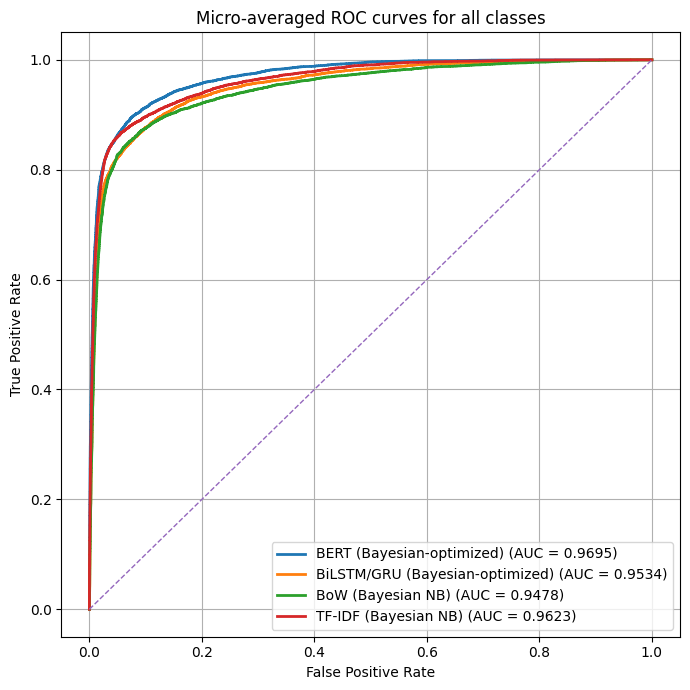

In [ ]:
# -----------------------------------------------------------------
# Save the TF-IDF NB model to a dedicated variable
tfidf_nb_model = final_model_TFIDF  # final_model_TFIDF is the trained TF-IDF Naive Bayes instance

# -----------------------------------------------------------------
# Rename the Keras RNN model immediately after its final training
#    (Assuming the variable `model` was the Sequential BiLSTM/GRU)
rnn_model = model  # rnn_model is the trained Keras BiLSTM/GRU

# -----------------------------------------------------------------
# Save the BoW Naive Bayes model
bow_nb_model = final_nb_bow

# ==============================================================
# Plot micro-averaged ROC curves for all four Bayesian-optimized methods
# ==============================================================

import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# True labels (integer-encoded 0 … num_classes-1)
y_true_int = test['target_enc']
num_classes = len(np.unique(y_true_int))
y_bin = label_binarize(y_true_int, classes=list(range(num_classes)))

# Predicted probability matrices (N×C) for each method

# BERT (PyTorch Trainer output)
test_proba_bert = torch.softmax(
    torch.tensor(test_out.predictions),
    dim=-1
).cpu().numpy()

# BiLSTM/GRU (Keras model)
# seq_test is the preprocessed test sequences array
test_proba_bilstm = rnn_model.predict(
    seq_test,
    batch_size=best['batch_size'],
    verbose=0
)

# BoW (Bayesian Naive Bayes)
# X_test_bow_vec is the BoW-transformed test feature matrix
test_proba_bow = bow_nb_model.predict_proba(X_test_bow_vec)

# TF-IDF (Bayesian Naive Bayes)
# X_test_vec is the TF-IDF-transformed test feature matrix
test_proba_tfidf = tfidf_nb_model.predict_proba(X_test_vec)

probas_dict = {
    'BERT (Bayesian-optimized)'      : test_proba_bert,
    'BiLSTM/GRU (Bayesian-optimized)': test_proba_bilstm,
    'BoW (Bayesian NB)'              : test_proba_bow,
    'TF-IDF (Bayesian NB)'           : test_proba_tfidf,
}

# Plot micro-averaged ROC curves
plt.figure(figsize=(7, 7))
for label, proba in probas_dict.items():
    fpr, tpr, _ = roc_curve(y_bin.ravel(), proba.ravel())
    roc_auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc_value:.4f})')

# Reference diagonal
plt.plot([0, 1], [0, 1], linestyle='--', lw=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-averaged ROC curves for all classes')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# --- at the very top of notebook/session ---
import pandas as pd, os

# keep original for fallback
_original_to_csv = pd.DataFrame.to_csv

def _to_csv_append(self, path, *args, **kwargs):
    """
    Monkey-patched to always append:
     - mode='a'  → append
     - header=False if file exists, True otherwise
    Any explicit mode/header passed in will be honored.
    """
    # only inject defaults if user didn't supply them
    if 'mode'   not in kwargs: kwargs['mode']   = 'a'
    if 'header' not in kwargs:
        # write header only when file doesn't exist or is empty
        kwargs['header'] = not os.path.exists(path) or os.path.getsize(path)==0
    return _original_to_csv(self, path, *args, **kwargs)

# replace pandas.DataFrame.to_csv with our append version
pd.DataFrame.to_csv = _to_csv_append

# now every df.to_csv('results/leaderboard.csv', index=False) will append safely


# SVM on TF-IDF features

In [ ]:
import time
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

# Start timer
start_svc_tfidf = time.time()

# Train the model with TF-IDF features
base_svc = LinearSVC(class_weight='balanced', random_state=42, max_iter=5000)
clf_svc_tfidf = CalibratedClassifierCV(base_svc, cv=3)
clf_svc_tfidf.fit(X_tr_tfidf, y_tr)

# Measure training time
elapsed_svc_tfidf = time.time() - start_svc_tfidf

# Estimate model size (number of parameters in millions)
n_features_tfidf = X_tr_tfidf.shape[1]
n_classes        = len(np.unique(y_tr))
param_svc_tfidf  = n_features_tfidf * n_classes / 1e6

# Make predictions and get probability estimates
preds_tfidf   = clf_svc_tfidf.predict(X_test_tfidf)
probas_tfidf  = clf_svc_tfidf.predict_proba(X_test_tfidf)

# Compute evaluation metrics
y_bin      = label_binarize(test['target'], classes=list(range(num_classes)))
acc_tfidf  = accuracy_score(test['target'], preds_tfidf)
prec_tfidf = precision_score(test['target'], preds_tfidf, average='macro')
rec_tfidf  = recall_score(test['target'], preds_tfidf, average='macro')
f1_tfidf   = f1_score(test['target'], preds_tfidf, average='macro')
auc_tfidf  = roc_auc_score(y_bin, probas_tfidf, average='macro')

# Print results
print(
    f"SVM (TF-IDF) → "
    f"Acc: {acc_tfidf:.4f}, "
    f"Prec: {prec_tfidf:.4f}, "
    f"Rec: {rec_tfidf:.4f}, "
    f"F1: {f1_tfidf:.4f}, "
    f"AUC: {auc_tfidf:.4f}"
)


SVM (TF-IDF) → Acc:0.8479, Prec:0.4945, Rec:0.4004, F1:0.3865, AUC:0.8459


# Decision Tree on TF-IDF features

In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
import pandas as pd

# Start timer
start_dt_tfidf = time.time()

# Train Decision Tree model using TF-IDF features
dt_clf_tfidf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_clf_tfidf.fit(X_tr_tfidf, y_tr)

# Measure training time
elapsed_dt_tfidf = time.time() - start_dt_tfidf

# Estimate model size by number of nodes (in millions)
param_dt_tfidf = dt_clf_tfidf.tree_.node_count / 1e6

# Make predictions and probability estimates
pred_dt_tfidf  = dt_clf_tfidf.predict(X_test_tfidf)
proba_dt_tfidf = dt_clf_tfidf.predict_proba(X_test_tfidf)

# Compute evaluation metrics
y_bin         = label_binarize(test['target'], classes=list(range(num_classes)))
dt_acc_tfidf  = accuracy_score(test['target'], pred_dt_tfidf)
dt_prec_tfidf = precision_score(test['target'], pred_dt_tfidf, average='macro')
dt_rec_tfidf  = recall_score(test['target'], pred_dt_tfidf, average='macro')
dt_f1_tfidf   = f1_score(test['target'], pred_dt_tfidf, average='macro')
dt_auc_tfidf  = roc_auc_score(y_bin, proba_dt_tfidf, average='macro')

# Add results to the summary DataFrame
new_row = pd.DataFrame([{
    'Method':                   'Decision Tree (TF-IDF)',
    'Params (M)':               param_dt_tfidf,
    'Time (s)':                 elapsed_dt_tfidf,
    'Test Accuracy':            dt_acc_tfidf,
    'Test Precision (macro)':   dt_prec_tfidf,
    'Test Recall (macro)':      dt_rec_tfidf,
    'Test F1 Score (macro)':    dt_f1_tfidf,
    'Macro ROC AUC':            dt_auc_tfidf
}])

results_summary = pd.concat([results_summary, new_row], ignore_index=True)
print(results_summary.tail(1))


                    Method  Test Accuracy  Test Precision (macro)  \
31  Decision Tree (TF-IDF)       0.658267                0.365947   

    Test Recall (macro)  Test F1 Score (macro)  Macro ROC AUC  Params (M)  \
31             0.369813               0.365204       0.639511    0.012361   

     Time (s)  
31  18.876941  


# Random Forest on TF-IDF features

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
import pandas as pd

# Start timer
start_rf_tfidf = time.time()

# Train Random Forest using TF-IDF features
rf_clf_tfidf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_clf_tfidf.fit(X_tr_tfidf, y_tr)

# Measure training time
elapsed_rf_tfidf = time.time() - start_rf_tfidf

# Estimate model size by summing all tree nodes (in millions)
param_rf_tfidf = sum(t.tree_.node_count for t in rf_clf_tfidf.estimators_) / 1e6

# Make predictions and probability estimates
pred_rf_tfidf  = rf_clf_tfidf.predict(X_test_tfidf)
proba_rf_tfidf = rf_clf_tfidf.predict_proba(X_test_tfidf)

# Compute evaluation metrics
y_bin         = label_binarize(test['target'], classes=list(range(num_classes)))
rf_acc_tfidf  = accuracy_score(test['target'], pred_rf_tfidf)
rf_prec_tfidf = precision_score(test['target'], pred_rf_tfidf, average='macro')
rf_rec_tfidf  = recall_score(test['target'], pred_rf_tfidf, average='macro')
rf_f1_tfidf   = f1_score(test['target'], pred_rf_tfidf, average='macro')
rf_auc_tfidf  = roc_auc_score(y_bin, proba_rf_tfidf, average='macro')

# Append results to the summary DataFrame
new_row = pd.DataFrame([{
    'Method':                   'Random Forest (TF-IDF)',
    'Params (M)':               param_rf_tfidf,
    'Time (s)':                 elapsed_rf_tfidf,
    'Test Accuracy':            rf_acc_tfidf,
    'Test Precision (macro)':   rf_prec_tfidf,
    'Test Recall (macro)':      rf_rec_tfidf,
    'Test F1 Score (macro)':    rf_f1_tfidf,
    'Macro ROC AUC':            rf_auc_tfidf
}])

results_summary = pd.concat([results_summary, new_row], ignore_index=True)
print(results_summary.tail(1))


                    Method  Test Accuracy  Test Precision (macro)  \
17  Random Forest (TF-IDF)         0.8136                 0.47682   

    Test Recall (macro)  Test F1 Score (macro)  Macro ROC AUC  Params (M)  \
17              0.37748               0.357597       0.815665    1.622142   

    Time (s)  
17   8.71301  


In [ ]:
# === After running SVM, Decision Tree, and Random Forest and appending to results_summary ===

# Option A: If results_summary already contains all previous methods (TF-IDF, BoW, DL, BERT, plus these three)
results_summary.to_csv('results/leaderboard.csv', index=False)
print("Leaderboard.csv updated with SVM, Decision Tree, and Random Forest.")

# Option B: If prefer to load the existing CSV and append only the last three rows:
import pandas as pd

# load existing leaderboard
bench = pd.read_csv('results/leaderboard.csv')

# assume the last three rows in results_summary are the new ones:
new_rows = results_summary.tail(3)

# concatenate and dedupe if is prefered
updated = pd.concat([bench, new_rows], ignore_index=True)

# save back
updated.to_csv('results/leaderboard.csv', index=False)
print("Leaderboard.csv appended with new traditional ML methods.")

Leaderboard.csv updated with SVM, Decision Tree, and Random Forest.
Leaderboard.csv appended with new traditional ML methods.


# SVM LSTM

In [ ]:
from tensorflow.keras.models import Model

# Rename the model variables to match environment.
#   - auto_att_model   : Auto-tuned + pretrained + attention model
#   - manual_att_model : Manually tuned + pretrained + attention model
#   - hybrid_att_model : Hybrid + pretrained + attention model
auto_att_model    = best_model
manual_att_model  = model_final
hybrid_att_model  = best_model_final

# Create extractors to output the "dense_2" layer
auto_feat_extractor   = Model(inputs=auto_att_model.input,
                              outputs=auto_att_model.get_layer("dense_2").output)
manual_feat_extractor = Model(inputs=manual_att_model.input,
                              outputs=manual_att_model.get_layer("dense_2").output)
hybrid_feat_extractor = Model(inputs=hybrid_att_model.input,
                              outputs=hybrid_att_model.get_layer("dense_2").output)

# Pass the train/test sequences through the extractors to create feature arrays
X_tr_auto_feat    = auto_feat_extractor.predict(seq_tr)
X_test_auto_feat  = auto_feat_extractor.predict(seq_test)

X_tr_manual_feat    = manual_feat_extractor.predict(seq_tr)
X_test_manual_feat  = manual_feat_extractor.predict(seq_test)

X_tr_hybrid_feat    = hybrid_feat_extractor.predict(seq_tr)
X_test_hybrid_feat  = hybrid_feat_extractor.predict(seq_test)

results_summary = pd.DataFrame(columns=[
    'Method',
    'Test Accuracy',
    'Test Precision (macro)',
    'Test Recall (macro)',
    'Test F1 Score (macro)',
    'Macro ROC AUC'
])

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize test labels for ROC-AUC calculation
y_bin = label_binarize(test['target'], classes=list(range(num_classes)))

# Initialize holders for probability outputs
proba_svm_auto_att = None
proba_svm_manual_att = None
proba_svm_hybrid_att = None

# Train and evaluate SVM on different feature sets
for name, X_tr_feat, X_te_feat in [
    ('Automated(pre+att)', X_tr_auto_feat, X_test_auto_feat),
    ('Manual(pre+att)',    X_tr_manual_feat, X_test_manual_feat),
    ('Hybrid(pre+att)',    X_tr_hybrid_feat, X_test_hybrid_feat),
]:
    # Start timer
    start_svm_lstm = time.time()

    # Train SVM classifier with linear kernel
    svm_clf_lstm = SVC(kernel='linear', probability=True,
                       class_weight='balanced', random_state=42)
    svm_clf_lstm.fit(X_tr_feat, y_tr)

    # Measure elapsed time
    elapsed_svm_lstm = time.time() - start_svm_lstm

    # Estimate model size: number of features × number of classes (in millions)
    n_feat = X_tr_feat.shape[1]
    n_classes = len(np.unique(y_tr))
    param_svm_lstm = n_feat * n_classes / 1e6

    # Make predictions and compute probability estimates
    pred_lstm = svm_clf_lstm.predict(X_te_feat)
    proba_lstm = svm_clf_lstm.predict_proba(X_te_feat)

    # Save probability outputs under specific variable names
    if name == 'Automated(pre+att)':
        proba_svm_auto_att = proba_lstm
    elif name == 'Manual(pre+att)':
        proba_svm_manual_att = proba_lstm
    else:
        proba_svm_hybrid_att = proba_lstm

    # Calculate evaluation metrics
    acc_lstm  = accuracy_score(test['target'], pred_lstm)
    prec_lstm = precision_score(test['target'], pred_lstm, average='macro')
    rec_lstm  = recall_score(test['target'], pred_lstm, average='macro')
    f1_lstm   = f1_score(test['target'], pred_lstm, average='macro')
    auc_lstm  = roc_auc_score(y_bin, proba_lstm, average='macro')

    # Print performance results
    print(f"SVM ({name}) — Acc: {acc_lstm:.4f}, Prec: {prec_lstm:.4f}, "
          f"Rec: {rec_lstm:.4f}, F1: {f1_lstm:.4f}, AUC: {auc_lstm:.4f}")

    # Append evaluation results to the summary DataFrame
    new_row = pd.DataFrame([{
        'Method':                  f'SVM ({name})',
        'Params (M)':              param_svm_lstm,
        'Time (s)':                elapsed_svm_lstm,
        'Test Accuracy':           acc_lstm,
        'Test Precision (macro)':  prec_lstm,
        'Test Recall (macro)':     rec_lstm,
        'Test F1 Score (macro)':   f1_lstm,
        'Macro ROC AUC':           auc_lstm
    }])
    results_summary = pd.concat([results_summary, new_row], ignore_index=True)

# Remove duplicate entries based on method and ROC-AUC
results_summary.drop_duplicates(
    subset=['Method', 'Macro ROC AUC'], keep='first', inplace=True
)

# Display final summary
print(results_summary)


SVM (Automated(pre+att)) — Acc: 0.7047, Prec: 0.4529, Rec: 0.4851, F1: 0.4483, AUC: 0.8478
SVM (Manual(pre+att)) — Acc: 0.6889, Prec: 0.4676, Rec: 0.5182, F1: 0.4601, AUC: 0.8850
SVM (Hybrid(pre+att)) — Acc: 0.6909, Prec: 0.4686, Rec: 0.5149, F1: 0.4609, AUC: 0.8841
                               Method  Test Accuracy  Test Precision (macro)  \
0            SVM (Automated(pre+att))       0.704667                0.452940   
1               SVM (Manual(pre+att))       0.688933                0.467610   
2               SVM (Hybrid(pre+att))       0.690933                0.468631   
3   Decision Tree (Automated+pre+att)       0.774933                0.437801   
4      Decision Tree (Manual+pre+att)       0.780267                0.442256   
5      Decision Tree (Hybrid+pre+att)       0.776933                0.427836   
6   Random Forest (Automated+pre+att)       0.797067                0.453888   
7      Random Forest (Manual+pre+att)       0.838400                0.507308   
8      Random

# Decision  Tree  LSTM

In [ ]:
import time
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assumes y_bin is already defined
# Initialize probability holders
proba_dt_auto_att    = None
proba_dt_manual_att  = None
proba_dt_hybrid_att  = None

# Train and evaluate Decision Tree on multiple feature sets
for name, X_tr_feat, X_te_feat in [
    ('Automated+pre+att', X_tr_auto_feat,   X_test_auto_feat),
    ('Manual+pre+att',    X_tr_manual_feat, X_test_manual_feat),
    ('Hybrid+pre+att',    X_tr_hybrid_feat, X_test_hybrid_feat),
]:
    # Start timer
    start_dt = time.time()

    # Train Decision Tree model
    dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
    dt_clf.fit(X_tr_feat, y_tr)

    # Measure elapsed time and compute model size
    elapsed_dt = time.time() - start_dt
    param_dt   = dt_clf.tree_.node_count / 1e6  # in millions

    # Make predictions and compute probabilities
    pred_dt  = dt_clf.predict(X_te_feat)
    proba_dt = dt_clf.predict_proba(X_te_feat)

    # Store probabilities and metrics in specific variables for later use
    if name == 'Automated+pre+att':
        proba_dt_auto_att = proba_dt
        acc_dt_auto_att   = accuracy_score(test['target'], pred_dt)
        prec_dt_auto_att  = precision_score(test['target'], pred_dt, average='macro')
        rec_dt_auto_att   = recall_score(test['target'], pred_dt, average='macro')
        f1_dt_auto_att    = f1_score(test['target'], pred_dt, average='macro')
        auc_dt_auto_att   = roc_auc_score(y_bin, proba_dt, average='macro')
    elif name == 'Manual+pre+att':
        proba_dt_manual_att = proba_dt
        acc_dt_manual_att   = accuracy_score(test['target'], pred_dt)
        prec_dt_manual_att  = precision_score(test['target'], pred_dt, average='macro')
        rec_dt_manual_att   = recall_score(test['target'], pred_dt, average='macro')
        f1_dt_manual_att    = f1_score(test['target'], pred_dt, average='macro')
        auc_dt_manual_att   = roc_auc_score(y_bin, proba_dt, average='macro')
    else:
        proba_dt_hybrid_att = proba_dt
        acc_dt_hybrid_att   = accuracy_score(test['target'], pred_dt)
        prec_dt_hybrid_att  = precision_score(test['target'], pred_dt, average='macro')
        rec_dt_hybrid_att   = recall_score(test['target'], pred_dt, average='macro')
        f1_dt_hybrid_att    = f1_score(test['target'], pred_dt, average='macro')
        auc_dt_hybrid_att   = roc_auc_score(y_bin, proba_dt, average='macro')

    # Append evaluation results to the summary DataFrame
    new_row = pd.DataFrame([{
        'Method':                  f'Decision Tree ({name})',
        'Params (M)':              param_dt,
        'Time (s)':                elapsed_dt,
        'Test Accuracy':           accuracy_score(test['target'], pred_dt),
        'Test Precision (macro)':  precision_score(test['target'], pred_dt, average='macro'),
        'Test Recall (macro)':     recall_score(test['target'], pred_dt, average='macro'),
        'Test F1 Score (macro)':   f1_score(test['target'], pred_dt, average='macro'),
        'Macro ROC AUC':           roc_auc_score(y_bin, proba_dt, average='macro')
    }])
    results_summary = pd.concat([results_summary, new_row], ignore_index=True)

# Display the last 3 results
print(results_summary.tail(3))


                               Method  Test Accuracy  Test Precision (macro)  \
18  Decision Tree (Automated+pre+att)       0.774933                0.437801   
19     Decision Tree (Manual+pre+att)       0.780267                0.442256   
20     Decision Tree (Hybrid+pre+att)       0.776933                0.427836   

    Test Recall (macro)  Test F1 Score (macro)  Macro ROC AUC  Params (M)  \
18             0.442225               0.439571       0.690546    0.004345   
19             0.443995               0.443048       0.691129    0.007443   
20             0.429617               0.428387       0.684101    0.007007   

    Time (s)  
18  0.814331  
19  1.839873  
20  1.814479  


# Random Forest LSTM

In [ ]:
import time
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assumes y_bin is already defined
# Initialize probability placeholders for each feature type
proba_rf_auto_att    = None
proba_rf_manual_att  = None
proba_rf_hybrid_att  = None

# Train and evaluate Random Forest on multiple feature sets
for name, X_tr_feat, X_te_feat in [
    ('Automated+pre+att', X_tr_auto_feat,   X_test_auto_feat),
    ('Manual+pre+att',    X_tr_manual_feat, X_test_manual_feat),
    ('Hybrid+pre+att',    X_tr_hybrid_feat, X_test_hybrid_feat),
]:
    # Start timer for this iteration
    start_rf_lstm = time.time()

    # Train the Random Forest model
    rf_clf_lstm = RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    rf_clf_lstm.fit(X_tr_feat, y_tr)

    # Measure training time
    elapsed_rf_lstm = time.time() - start_rf_lstm

    # Estimate model size (total number of nodes across all trees, in millions)
    param_rf_lstm = sum(t.tree_.node_count for t in rf_clf_lstm.estimators_) / 1e6

    # Make predictions and probability estimates
    pred_rf_lstm  = rf_clf_lstm.predict(X_te_feat)
    proba_rf_lstm = rf_clf_lstm.predict_proba(X_te_feat)

    # Save probability output for later use
    if name == 'Automated+pre+att':
        proba_rf_auto_att = proba_rf_lstm
    elif name == 'Manual+pre+att':
        proba_rf_manual_att = proba_rf_lstm
    else:
        proba_rf_hybrid_att = proba_rf_lstm

    # Compute evaluation metrics
    acc_rf_lstm  = accuracy_score(test['target'], pred_rf_lstm)
    prec_rf_lstm = precision_score(test['target'], pred_rf_lstm, average='macro')
    rec_rf_lstm  = recall_score(test['target'], pred_rf_lstm, average='macro')
    f1_rf_lstm   = f1_score(test['target'], pred_rf_lstm, average='macro')
    auc_rf_lstm  = roc_auc_score(y_bin, proba_rf_lstm, average='macro')

    # Append the results to the summary DataFrame
    new_row = pd.DataFrame([{
        'Method':                 f'Random Forest ({name})',
        'Params (M)':             param_rf_lstm,
        'Time (s)':               elapsed_rf_lstm,
        'Test Accuracy':          acc_rf_lstm,
        'Test Precision (macro)': prec_rf_lstm,
        'Test Recall (macro)':    rec_rf_lstm,
        'Test F1 Score (macro)':  f1_rf_lstm,
        'Macro ROC AUC':          auc_rf_lstm
    }])
    results_summary = pd.concat([results_summary, new_row], ignore_index=True)

# Show the last 3 results
print(results_summary.tail(3))


                               Method  Test Accuracy  Test Precision (macro)  \
21  Random Forest (Automated+pre+att)       0.797067                0.453888   
22     Random Forest (Manual+pre+att)       0.838400                0.507308   
23     Random Forest (Hybrid+pre+att)       0.834267                0.494201   

    Test Recall (macro)  Test F1 Score (macro)  Macro ROC AUC  Params (M)  \
21             0.450013               0.451746       0.815688    0.348752   
22             0.441893               0.451834       0.864524    0.609584   
23             0.442844               0.451089       0.867342    0.569734   

    Time (s)  
21  1.084625  
22  1.744867  
23  1.827224  


In [ ]:
# === Persist LSTM‐feature traditional‐ML results into leaderboard.csv ===

# Option A: overwrite the leaderboard with all methods including the new LSTM‐based SVM/DT/RF entries
results_summary.to_csv('results/leaderboard.csv', index=False)
print("leaderboard.csv updated with LSTM feature‐based SVM, Decision Tree, and Random Forest results.")

# Option B: load existing leaderboard and append only the LSTM‐feature entries
import pandas as pd

bench   = pd.read_csv('results/leaderboard.csv')
new_rows = results_summary.tail(9)   # the 3 SVM + 3 DT + 3 RF rows just added
updated = pd.concat([bench, new_rows], ignore_index=True)
updated.to_csv('results/leaderboard.csv', index=False)
print("leaderboard.csv appended with LSTM feature‐based traditional ML results.")


leaderboard.csv updated with LSTM feature‐based SVM, Decision Tree, and Random Forest results.
leaderboard.csv appended with LSTM feature‐based traditional ML results.


# Bert

# SVM BERT

In [ ]:
import time
import torch
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
from sklearn.preprocessing import label_binarize

# Binarize for multiclass ROC once
y_bin = label_binarize(test['target'], classes=list(range(num_classes)))

# Move model to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_bert.to(device).eval()

# Tokenize (on CPU)
train_enc = tokenizer(
    train['text_str'].tolist(),
    padding='max_length', truncation=True, max_length=50, return_tensors='pt'
)
test_enc = tokenizer(
    test['text_str'].tolist(),
    padding='max_length', truncation=True, max_length=50, return_tensors='pt'
)

# Helper to extract embeddings
def extract_bert_embeddings(encodings, batch_size=32):
    all_emb = []
    for i in range(0, len(encodings.input_ids), batch_size):
        batch_ids  = encodings.input_ids[i:i+batch_size].to(device)
        batch_mask = encodings.attention_mask[i:i+batch_size].to(device)
        with torch.no_grad():
            out = model_bert.bert(input_ids=batch_ids, attention_mask=batch_mask)
        all_emb.append(out.pooler_output.cpu().numpy())
    return np.vstack(all_emb)

# Extract embeddings
X_tr_bert = extract_bert_embeddings(train_enc, batch_size=32)
X_te_bert = extract_bert_embeddings(test_enc,  batch_size=32)

# Train & time SVM
start_svm_bert = time.time()
svm_clf_bert = SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)
svm_clf_bert.fit(X_tr_bert, train['target'])
elapsed_svm_bert = time.time() - start_svm_bert

# Parameter count
n_feat_b     = X_tr_bert.shape[1]
param_svm_bert = n_feat_b * num_classes / 1e6

# Predict & proba with unique names
pred_svm_bert  = svm_clf_bert.predict(X_te_bert)
proba_svm_bert = svm_clf_bert.predict_proba(X_te_bert)

# Compute metrics
svm_acc_bert  = accuracy_score(test['target'], pred_svm_bert)
svm_prec_bert = precision_score(test['target'], pred_svm_bert, average='macro')
svm_rec_bert  = recall_score(test['target'], pred_svm_bert, average='macro')
svm_f1_bert   = f1_score(test['target'], pred_svm_bert, average='macro')
svm_auc_bert  = roc_auc_score(y_bin, proba_svm_bert, average='macro')

# Append to results_summary
new_row = pd.DataFrame([{
    'Method':                  'SVM (BERT batched)',
    'Params (M)':              param_svm_bert,
    'Time (s)':                elapsed_svm_bert,
    'Test Accuracy':           svm_acc_bert,
    'Test Precision (macro)':  svm_prec_bert,
    'Test Recall (macro)':     svm_rec_bert,
    'Test F1 Score (macro)':   svm_f1_bert,
    'Macro ROC AUC':           svm_auc_bert
}])
results_summary = pd.concat([results_summary, new_row], ignore_index=True)

print(results_summary.tail(1))


                Method  Test Accuracy  Test Precision (macro)  \
24  SVM (BERT batched)       0.781867                0.487751   

    Test Recall (macro)  Test F1 Score (macro)  Macro ROC AUC  Params (M)  \
24             0.521538               0.497327       0.878808     0.00384   

       Time (s)  
24  1174.611273  


# Decision Tree BERT

In [ ]:
import time
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train Decision Tree on BERT [CLS] embeddings
start_dt_bert = time.time()
dt_clf_bert = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_clf_bert.fit(X_tr_bert, train['target'])
elapsed_dt_bert = time.time() - start_dt_bert

# Parameter count (node count / 1e6)
param_dt_bert = dt_clf_bert.tree_.node_count / 1e6

# Predict & proba with unique names
pred_dt_bert  = dt_clf_bert.predict(X_te_bert)
proba_dt_bert = dt_clf_bert.predict_proba(X_te_bert)

# Compute metrics with unique suffixes
dt_acc_bert  = accuracy_score(test['target'], pred_dt_bert)
dt_prec_bert = precision_score(test['target'], pred_dt_bert, average='macro')
dt_rec_bert  = recall_score(test['target'], pred_dt_bert, average='macro')
dt_f1_bert   = f1_score(test['target'], pred_dt_bert, average='macro')
dt_auc_bert  = roc_auc_score(y_bin, proba_dt_bert, average='macro')

# Append to results_summary
new_row_dt_bert = pd.DataFrame([{
    'Method':                  'Decision Tree (BERT)',
    'Params (M)':              param_dt_bert,
    'Time (s)':                elapsed_dt_bert,
    'Test Accuracy':           dt_acc_bert,
    'Test Precision (macro)':  dt_prec_bert,
    'Test Recall (macro)':     dt_rec_bert,
    'Test F1 Score (macro)':   dt_f1_bert,
    'Macro ROC AUC':           dt_auc_bert
}])
results_summary = pd.concat([results_summary, new_row_dt_bert], ignore_index=True)

# store for ROC plotting
# proba_dt_bert now holds the probability array for Decision Tree (BERT)

print(results_summary.tail(1))


                  Method  Test Accuracy  Test Precision (macro)  \
25  Decision Tree (BERT)       0.787333                0.459278   

    Test Recall (macro)  Test F1 Score (macro)  Macro ROC AUC  Params (M)  \
25             0.466077               0.462167       0.704184    0.004849   

     Time (s)  
25  71.860447  


# Random Forest BERT

In [ ]:
import time
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train Random Forest on BERT [CLS] embeddings
start_rf_bert = time.time()
rf_clf_bert = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_clf_bert.fit(X_tr_bert, train['target'])
elapsed_rf_bert = time.time() - start_rf_bert

# Parameter count (sum of all tree nodes / 1e6)
param_rf_bert = sum(t.tree_.node_count for t in rf_clf_bert.estimators_) / 1e6

# Predict & proba with unique names
pred_rf_bert   = rf_clf_bert.predict(X_te_bert)
proba_rf_bert  = rf_clf_bert.predict_proba(X_te_bert)

# Compute metrics with unique suffixes
rf_acc_bert  = accuracy_score(test['target'], pred_rf_bert)
rf_prec_bert = precision_score(test['target'], pred_rf_bert, average='macro')
rf_rec_bert  = recall_score(test['target'], pred_rf_bert, average='macro')
rf_f1_bert   = f1_score(test['target'], pred_rf_bert, average='macro')
rf_auc_bert  = roc_auc_score(y_bin, proba_rf_bert, average='macro')

# Append to results_summary
new_row_rf_bert = pd.DataFrame([{
    'Method':                  'Random Forest (BERT)',
    'Params (M)':              param_rf_bert,
    'Time (s)':                elapsed_rf_bert,
    'Test Accuracy':           rf_acc_bert,
    'Test Precision (macro)':  rf_prec_bert,
    'Test Recall (macro)':     rf_rec_bert,
    'Test F1 Score (macro)':   rf_f1_bert,
    'Macro ROC AUC':           rf_auc_bert
}])
results_summary = pd.concat([results_summary, new_row_rf_bert], ignore_index=True)

# Store for ROC plotting
# proba_rf_bert now holds the probability array for Random Forest (BERT)

print(results_summary.tail(1))

                  Method  Test Accuracy  Test Precision (macro)  \
26  Random Forest (BERT)       0.827733                0.514014   

    Test Recall (macro)  Test F1 Score (macro)  Macro ROC AUC  Params (M)  \
26             0.492227                0.50013       0.876387    0.404138   

     Time (s)  
26  17.714214  


In [ ]:
# === Save updated leaderboard.csv including BERT‐based SVM/DT/RF ===
results_summary.to_csv('results/leaderboard.csv', index=False)
print("leaderboard.csv updated with BERT‐based SVM, Decision Tree, and Random Forest entries.")


leaderboard.csv updated with BERT‐based SVM, Decision Tree, and Random Forest entries.


# BoW

# SVM BoW

In [ ]:
import time
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
import pandas as pd

# Binarize for multiclass ROC
y_bin = label_binarize(test['target'], classes=list(range(num_classes)))

# Train calibrated LinearSVC on BoW
start_svc_bow = time.time()
base_svc_bow = LinearSVC(class_weight='balanced', random_state=42, max_iter=5000)
clf_svc_bow  = CalibratedClassifierCV(base_svc_bow, cv=3)
clf_svc_bow.fit(X_tr_bow, y_tr)
elapsed_svc_bow = time.time() - start_svc_bow

# Parameter count (n_features × n_classes / 1e6)
n_feat_bow = X_tr_bow.shape[1]
param_svc_bow = n_feat_bow * num_classes / 1e6

# Predict & proba
pred_svc_bow  = clf_svc_bow.predict(X_test_bow)
proba_svc_bow = clf_svc_bow.predict_proba(X_test_bow)

# Compute metrics
acc_svc_bow  = accuracy_score(test['target'], pred_svc_bow)
prec_svc_bow = precision_score(test['target'], pred_svc_bow, average='macro')
rec_svc_bow  = recall_score(test['target'], pred_svc_bow, average='macro')
f1_svc_bow   = f1_score(test['target'], pred_svc_bow, average='macro')
auc_svc_bow  = roc_auc_score(y_bin, proba_svc_bow, average='macro')

# Append to results_summary
new_row = pd.DataFrame([{
    'Method':                   'LinearSVC+Calibrated (BoW)',
    'Params (M)':               param_svc_bow,
    'Time (s)':                 elapsed_svc_bow,
    'Test Accuracy':            acc_svc_bow,
    'Test Precision (macro)':   prec_svc_bow,
    'Test Recall (macro)':      rec_svc_bow,
    'Test F1 Score (macro)':    f1_svc_bow,
    'Macro ROC AUC':            auc_svc_bow
}])
results_summary = pd.concat([results_summary, new_row], ignore_index=True)

print(results_summary.tail(1))


                        Method  Test Accuracy  Test Precision (macro)  \
27  LinearSVC+Calibrated (BoW)       0.837067                0.465993   

    Test Recall (macro)  Test F1 Score (macro)  Macro ROC AUC  Params (M)  \
27             0.389441               0.372337       0.825016        0.05   

      Time (s)  
27  222.364771  


In [ ]:
import time
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
import pandas as pd

# Start timer
start_svm_bow = time.time()

# Train SVM using Bag-of-Words features
svm_clf_bow = SVC(kernel='linear', probability=True,
                  class_weight='balanced', random_state=42)
svm_clf_bow.fit(X_tr_bow, y_tr)

# Measure training time
elapsed_svm_bow = time.time() - start_svm_bow

# Estimate number of parameters (features × classes, in millions)
n_features_bow = X_tr_bow.shape[1]
n_classes      = len(np.unique(y_tr))
param_svm_bow  = n_features_bow * n_classes / 1e6

# Make predictions and compute probability estimates on test data
pred_svm_bow  = svm_clf_bow.predict(X_test_bow)
proba_svm_bow = svm_clf_bow.predict_proba(X_test_bow)

# Compute evaluation metrics
y_bin_bow   = label_binarize(test['target'], classes=list(range(num_classes)))
acc_svm_bow = accuracy_score(test['target'], pred_svm_bow)
prec_svm_bow = precision_score(test['target'], pred_svm_bow, average='macro')
rec_svm_bow  = recall_score(test['target'], pred_svm_bow, average='macro')
f1_svm_bow   = f1_score(test['target'], pred_svm_bow, average='macro')
auc_svm_bow  = roc_auc_score(y_bin_bow, proba_svm_bow, average='macro')

# Add results to the summary DataFrame
new_row = pd.DataFrame([{
    'Method':                 'SVM (BoW)',
    'Params (M)':             param_svm_bow,
    'Time (s)':               elapsed_svm_bow,
    'Test Accuracy':          acc_svm_bow,
    'Test Precision (macro)': prec_svm_bow,
    'Test Recall (macro)':    rec_svm_bow,
    'Test F1 Score (macro)':  f1_svm_bow,
    'Macro ROC AUC':          auc_svm_bow
}])
results_summary = pd.concat([results_summary, new_row], ignore_index=True)

# Show the latest result
print(results_summary.tail(1))


       Method  Test Accuracy  Test Precision (macro)  Test Recall (macro)  \
28  SVM (BoW)       0.767067                0.431415             0.438578   

    Test F1 Score (macro)  Macro ROC AUC  Params (M)    Time (s)  
28               0.433787       0.842728        0.05  753.760516  


# Decision Tree BoW

In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
import pandas as pd

# Start timer
start_dt_bow = time.time()

# Train Decision Tree classifier using BoW features
dt_clf_bow = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_clf_bow.fit(X_tr_bow, y_tr)

# Measure training time
elapsed_dt_bow = time.time() - start_dt_bow

# Estimate model size (number of nodes in millions)
param_dt_bow = dt_clf_bow.tree_.node_count / 1e6

# Make predictions and probability estimates
pred_dt_bow  = dt_clf_bow.predict(X_test_bow)
proba_dt_bow = dt_clf_bow.predict_proba(X_test_bow)

# Compute evaluation metrics
y_bin_bow   = label_binarize(test['target'], classes=list(range(num_classes)))
acc_dt_bow  = accuracy_score(test['target'], pred_dt_bow)
prec_dt_bow = precision_score(test['target'], pred_dt_bow, average='macro')
rec_dt_bow  = recall_score(test['target'], pred_dt_bow, average='macro')
f1_dt_bow   = f1_score(test['target'], pred_dt_bow, average='macro')
auc_dt_bow  = roc_auc_score(y_bin_bow, proba_dt_bow, average='macro')

# Append results to the summary DataFrame
new_row = pd.DataFrame([{
    'Method':                 'Decision Tree (BoW)',
    'Params (M)':             param_dt_bow,
    'Time (s)':               elapsed_dt_bow,
    'Test Accuracy':          acc_dt_bow,
    'Test Precision (macro)': prec_dt_bow,
    'Test Recall (macro)':    rec_dt_bow,
    'Test F1 Score (macro)':  f1_dt_bow,
    'Macro ROC AUC':          auc_dt_bow
}])
results_summary = pd.concat([results_summary, new_row], ignore_index=True)

# Display the most recent result
print(results_summary.tail(1))


                 Method  Test Accuracy  Test Precision (macro)  \
29  Decision Tree (BoW)       0.670533                0.376576   

    Test Recall (macro)  Test F1 Score (macro)  Macro ROC AUC  Params (M)  \
29              0.38159               0.376269       0.647097    0.014291   

     Time (s)  
29  14.746017  


# Random Forest BoW

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
import pandas as pd

# Start timer
start_rf_bow = time.time()

# Train Random Forest classifier on BoW features
rf_clf_bow = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_clf_bow.fit(X_tr_bow, y_tr)

# Measure training time
elapsed_rf_bow = time.time() - start_rf_bow

# Estimate model size by summing node counts of all trees (in millions)
param_rf_bow = sum(t.tree_.node_count for t in rf_clf_bow.estimators_) / 1e6

# Make predictions and probability estimates
pred_rf_bow  = rf_clf_bow.predict(X_test_bow)
proba_rf_bow = rf_clf_bow.predict_proba(X_test_bow)

# Compute evaluation metrics
acc_rf_bow  = accuracy_score(test['target'], pred_rf_bow)
prec_rf_bow = precision_score(test['target'], pred_rf_bow, average='macro')
rec_rf_bow  = recall_score(test['target'], pred_rf_bow, average='macro')
f1_rf_bow   = f1_score(test['target'], pred_rf_bow, average='macro')
auc_rf_bow  = roc_auc_score(y_bin_bow, proba_rf_bow, average='macro')

# Add results to the summary DataFrame
new_row = pd.DataFrame([{
    'Method':                 'Random Forest (BoW)',
    'Params (M)':             param_rf_bow,
    'Time (s)':               elapsed_rf_bow,
    'Test Accuracy':          acc_rf_bow,
    'Test Precision (macro)': prec_rf_bow,
    'Test Recall (macro)':    rec_rf_bow,
    'Test F1 Score (macro)':  f1_rf_bow,
    'Macro ROC AUC':          auc_rf_bow
}])
results_summary = pd.concat([results_summary, new_row], ignore_index=True)

# proba_rf_bow holds the predicted probabilities for ROC plotting
print(results_summary.tail(1))


                 Method  Test Accuracy  Test Precision (macro)  \
30  Random Forest (BoW)       0.814267                0.476396   

    Test Recall (macro)  Test F1 Score (macro)  Macro ROC AUC  Params (M)  \
30             0.378451               0.360045       0.813675    1.898606   

    Time (s)  
30  9.557875  


In [ ]:
# === Save updated leaderboard.csv ===
results_summary.to_csv('results/leaderboard.csv', index=False)
print("leaderboard.csv updated with BoW-based SVM, Decision Tree, and Random Forest entries.")


leaderboard.csv updated with BoW-based SVM, Decision Tree, and Random Forest entries.


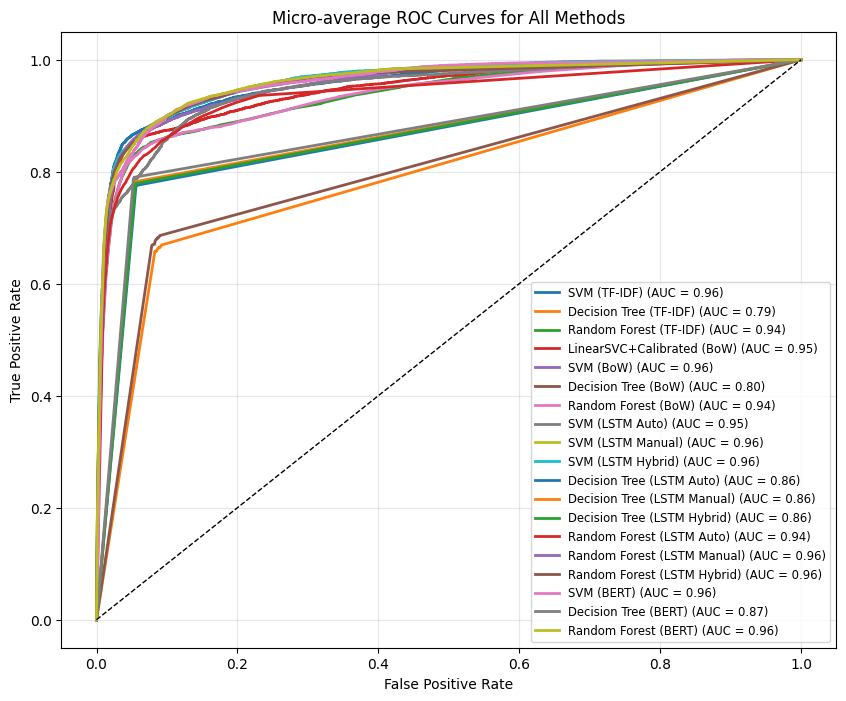

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize true labels for multiclass ROC evaluation
y_true_bin = label_binarize(test['target'], classes=list(range(num_classes)))

# Dictionary mapping method names to their predicted probabilities
methods_probas = {
    # TF-IDF based models
    'SVM (TF-IDF)':              probas_tfidf,
    'Decision Tree (TF-IDF)':    proba_dt_tfidf,
    'Random Forest (TF-IDF)':    proba_rf_tfidf,

    # Bag-of-Words based models
    'LinearSVC+Calibrated (BoW)': proba_svc_bow,
    'SVM (BoW)':                  proba_svm_bow,
    'Decision Tree (BoW)':        proba_dt_bow,
    'Random Forest (BoW)':        proba_rf_bow,

    # LSTM-based feature models (SVM)
    'SVM (LSTM Auto)':            proba_svm_auto_att,
    'SVM (LSTM Manual)':          proba_svm_manual_att,
    'SVM (LSTM Hybrid)':          proba_svm_hybrid_att,

    # LSTM-based feature models (Decision Tree)
    'Decision Tree (LSTM Auto)':   proba_dt_auto_att,
    'Decision Tree (LSTM Manual)': proba_dt_manual_att,
    'Decision Tree (LSTM Hybrid)': proba_dt_hybrid_att,

    # LSTM-based feature models (Random Forest)
    'Random Forest (LSTM Auto)':   proba_rf_auto_att,
    'Random Forest (LSTM Manual)': proba_rf_manual_att,
    'Random Forest (LSTM Hybrid)': proba_rf_hybrid_att,

    # BERT-based feature models
    'SVM (BERT)':                  proba_svm_bert,
    'Decision Tree (BERT)':        proba_dt_bert,
    'Random Forest (BERT)':        proba_rf_bert
}

# Plot micro-averaged ROC curves for all models
plt.figure(figsize=(10, 8))
for name, proba in methods_probas.items():
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), proba.ravel())
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

# Add diagonal reference line and formatting
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title('Micro-Average ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize='small')
plt.grid(alpha=0.3)
plt.show()


In [ ]:
import os
import pandas as pd

# Load and remove duplicates
path = 'results/leaderboard.csv'
if not os.path.isfile(path):
    raise FileNotFoundError(f"Leaderboard file not found at {path}")

df = pd.read_csv(path)
# Remove duplicates: keep only the last entry when both Method and Test Accuracy are identical
deduped = df.drop_duplicates(subset=['Method', 'Test Accuracy'], keep='last').reset_index(drop=True)

# Restore the original to_csv
pd.DataFrame.to_csv = _original_to_csv

# Save to a new file (write mode, not append)
output_path = 'results/final_benchmark.csv'
os.makedirs(os.path.dirname(output_path), exist_ok=True)
deduped.to_csv(output_path, index=False)

print(f"Deduplicated benchmark saved to {output_path}")

Deduplicated benchmark saved to results/final_benchmark.csv


In [ ]:
import pandas as pd

# Read the original CSV
df = pd.read_csv('results/final_benchmark.csv')

# Keep only the first occurrence of each Method (remove duplicate rows by position)
df = df.drop_duplicates(subset=['Method'], keep='first')

# Fill missing values in 'Test F1 Score (weight)' with 0
df['Test F1 Score (weighted)'] = df['Test F1 Score (weighted)'].fillna(0)

# For any missing 'Test F1 Score (macro)', substitute the weight score
df['Test F1 Score (macro)'] = df['Test F1 Score (macro)'] \
    .fillna(df['Test F1 Score (weighted)'])

# Inspect the first few rows of the F1 columns
print(df[['Method', 'Test F1 Score (macro)', 'Test F1 Score (weighted)']].head(10))

# Save the cleaned DataFrame to a new CSV
df.to_csv('results/final_benchmark_cleaned.csv', index=False)
print("✔ Saved cleaned data to 'results/final_benchmark_cleaned.csv'")


                            Method  Test F1 Score (macro)  \
0                        Automated               0.801716   
1                           Manual               0.795147   
2                           Hybrid               0.785869   
3               Automated(pre+att)               0.802610   
4                  Manual(pre+att)               0.794324   
5                  Hybrid(pre+att)               0.801501   
6                 BERT Fine-Tuning               0.821083   
7             TF-IDF (Bayesian NB)               0.790692   
8                BoW (Bayesian NB)               0.804300   
9  BiLSTM/GRU (Bayesian-optimized)               0.798949   

   Test F1 Score (weighted)  
0                  0.000000  
1                  0.000000  
2                  0.000000  
3                  0.000000  
4                  0.000000  
5                  0.000000  
6                  0.000000  
7                  0.000000  
8                  0.000000  
9                  0.798949 

<h2 style="text-align: center;"></h2>

<center>
  <h1> Step 5 &nbsp : &nbsp Conclusions </h1>
</center>

In [ ]:
overall_results = pd.concat([results_summary_1, results_summary_2, results_summary_2_2, results_summary_3], ignore_index=True)

print("Overall Results:")
print(overall_results.fillna('')) # Replace NaN to Blank for easy to check out intuitively

Overall Results:
  Method1 Test Accuracy Test F1 Score              Method  Accuracy  F1 Score
0  TF-IDF      0.809867       0.80806                                        
1     BoW      0.800667      0.801861                                        
2                                               Automated     0.817  0.800992
3                                                  Manual  0.844267  0.795147
4                                                  Hybrid  0.841733  0.785869
5                                      Automated(pre+att)    0.8212   0.80261
6                                         Manual(pre+att)  0.843733  0.794324
7                                         Hybrid(pre+att)     0.844  0.801501
8                                                    BERT     0.832  0.821083
